In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_colwidth', -1)
pd.options.mode.chained_assignment = None  # default='warn'
import math
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [271]:
loan=pd.read_csv("data/loan.csv",low_memory=False)
loan.shape

(39717, 111)

In [272]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


https://rstudio-pubs-static.s3.amazonaws.com/115829_32417d32dbce41eab3eeaf608a0eef9d.html

### Let us check pecentage of missing values in each column

In [273]:

round(100*(loan.isnull().sum()/len(loan.index)), 2)


id                                0.00  
member_id                         0.00  
loan_amnt                         0.00  
funded_amnt                       0.00  
funded_amnt_inv                   0.00  
term                              0.00  
int_rate                          0.00  
installment                       0.00  
grade                             0.00  
sub_grade                         0.00  
emp_title                         6.19  
emp_length                        2.71  
home_ownership                    0.00  
annual_inc                        0.00  
verification_status               0.00  
issue_d                           0.00  
loan_status                       0.00  
pymnt_plan                        0.00  
url                               0.00  
desc                              32.58 
purpose                           0.00  
title                             0.03  
zip_code                          0.00  
addr_state                        0.00  
dti             

### There are lot of columns which have all values NULL, let us remove them from the data

In [274]:
# There are a lot of columns which have all null values, we have to remove them.
loan_cleaned=loan.loc[:,round(100*(loan.isnull().sum(axis=0)/len(loan.index)), 2) != 100.00]

In [275]:
loan_cleaned.shape # we now only have 57 columns.


(39717, 57)

In [276]:
round(100*(loan_cleaned.isnull().sum()/len(loan_cleaned.index)), 2)

loan_cleaned.isnull().sum()

id                            0    
member_id                     0    
loan_amnt                     0    
funded_amnt                   0    
funded_amnt_inv               0    
term                          0    
int_rate                      0    
installment                   0    
grade                         0    
sub_grade                     0    
emp_title                     2459 
emp_length                    1075 
home_ownership                0    
annual_inc                    0    
verification_status           0    
issue_d                       0    
loan_status                   0    
pymnt_plan                    0    
url                           0    
desc                          12940
purpose                       0    
title                         11   
zip_code                      0    
addr_state                    0    
dti                           0    
delinq_2yrs                   0    
earliest_cr_line              0    
inq_last_6mths              

### we can see that mths_since_last_delinq has 64% missing values, mths_since_last_record  has 92% missing and mext_paymnt_d has 97% missing values
#### Mths_since_last_delinq null may indicate that the user has never delinquited on his loan. So may be we can create a feature has deliquined before


In [277]:
loan_cleaned['has_last_delinq']=loan_cleaned['mths_since_last_delinq'].apply(lambda x:pd.isnull(x))

In [278]:
loan_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,has_last_delinq
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,True
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,True
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,True
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,False
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,False


In [279]:
# desc field also has 32% missing values. Let us check what this field contains 
loan_cleaned['desc'].head()

0      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

### desc field contains borrowers reasons for taking a loan. This field can be ignored for our analysis

#### Let us remove fields with >90% missing values, and mths_since_last_delinq and desc fields

In [280]:
loan_cleaned=loan_cleaned.loc[:,round(100*(loan_cleaned.isnull().sum(axis=0)/len(loan_cleaned.index)), 2)<90.00]

In [281]:
loan_cleaned.drop(['desc','mths_since_last_delinq'],axis=1,inplace=True)

In [282]:
loan_cleaned.shape

(39717, 54)

#### URL is URL for the LC page with listing data. This is accessible only by the investor and does not add any information. So let us remove this column from our analysis

In [283]:
loan_cleaned.drop(['url'],axis=1,inplace=True)


In [284]:
loan_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,has_last_delinq
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,True
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,True
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,True
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,False
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,False


### Let us check how many unique values a field has. If throughout the data, a field has only one unique value, it is not going to add meaning to our analysis

In [285]:
loan_cleaned.T.apply(lambda x: x.nunique(), axis=1)

id                            39717
member_id                     39717
loan_amnt                     885  
funded_amnt                   1041 
funded_amnt_inv               8205 
term                          2    
int_rate                      371  
installment                   15383
grade                         7    
sub_grade                     35   
emp_title                     28820
emp_length                    11   
home_ownership                5    
annual_inc                    5318 
verification_status           3    
issue_d                       55   
loan_status                   3    
pymnt_plan                    1    
purpose                       14   
title                         19615
zip_code                      823  
addr_state                    50   
dti                           2868 
delinq_2yrs                   11   
earliest_cr_line              526  
inq_last_6mths                9    
open_acc                      40   
pub_rec                     

#### Fields like payment_plan, policy_code, application_type have only one value throughout and should be removed


In [286]:
loan_cleaned=loan_cleaned.loc[:,loan_cleaned.nunique()>1]

In [287]:
loan_cleaned.shape

(39717, 44)

In [288]:
# Employee title has a lot of unique values let us check
loan_cleaned['emp_title']

0        NaN                                           
1        Ryder                                         
2        NaN                                           
3        AIR RESOURCES BOARD                           
4        University Medical Group                      
5        Veolia Transportaton                          
6        Southern Star Photography                     
7        MKC Accounting                                
8        NaN                                           
9        Starbucks                                     
10       Southwest Rural metro                         
11       UCLA                                          
12       Va. Dept of Conservation/Recreation           
13       Target                                        
14       SFMTA                                         
15       Internal revenue Service                      
16       Chin's Restaurant                             
17       Duracell                               

In [289]:
# let us remove this column, it is series of text.
loan_cleaned.drop(['emp_title'],axis=1,inplace=True)

#### Employee length is missing for 1075 rows. May be these are self-employed or business people
#### Let us check how loan_status is for the rows with missing employee length, before deciding what to do with missing values


In [290]:
missing_emp_length=loan_cleaned[pd.isnull(loan_cleaned['emp_length'])]

In [291]:
missing_emp_length.shape

(1075, 43)

In [292]:
missing_emp_length.groupby(['loan_status'])['id'].count().reset_index()

,loan_status,id
0,Charged Off,228
1,Current,42
2,Fully Paid,805


##### we can see that for employees with missing emp_length, 228 have charged off. 
##### Instead of deleting them from analysis, let us create "Missing" as another category in emp_length

In [293]:
loan_cleaned.loc[pd.isnull(loan_cleaned['emp_length']),'emp_length']='Missing'

In [294]:
loan_cleaned.groupby(['emp_length'])['id'].count().reset_index()

,emp_length,id
0,1 year,3240
1,10+ years,8879
2,2 years,4388
3,3 years,4095
4,4 years,3436
5,5 years,3282
6,6 years,2229
7,7 years,1773
8,8 years,1479
9,9 years,1258


#### There are 11 missing values in title, this is the loan title provided. Let us check this field 

In [295]:
loan_cleaned.groupby('title').id.count().reset_index()

,title,id
0,\tdebt_consolidation,2
1,HITEK EQUIPMENT,1
2,APRILIA TUONO 1000R,1
3,Auto,1
4,Auto Loan,1
5,Bill pay of,1
6,Business Loan,1
7,CC Consolidation Loan,1
8,Car loan,1
9,Citifinancial consolidation,1


In [296]:
# The title field is the purpose of the loan as written by the borrower. This field is of no use as we already have an purpose field in the data
loan_cleaned.drop(['title'],axis=1,inplace=True)

In [297]:
loan_cleaned.to_csv('loan_cleaned.csv',index=False)

## Fields that are irrelant and have to be dropped
1. out_prncp and out_prncp_inv are remaining principal amount that is to be paid wrt to the amount funded and amount funded by investors respectively.This means that this applicable only for currentt loans. We cann hence discard these fields
2. recoveries, which indicated the recovery related expenses after loan is charged off
3. collection_recovery_fee , which is the fee to be collected after a loan is charged off

In [298]:
loan_cleaned.drop(['recoveries','collection_recovery_fee'],axis=1,inplace=True)

In [299]:
loan_cleaned.drop(['out_prncp','out_prncp_inv'],axis=1,inplace=True)

In [300]:
loan_cleaned.to_csv('loan_cleaned.csv',index=False)

In [301]:
loan_cleaned.isnull().sum()

id                      0  
member_id               0  
loan_amnt               0  
funded_amnt             0  
funded_amnt_inv         0  
term                    0  
int_rate                0  
installment             0  
grade                   0  
sub_grade               0  
emp_length              0  
home_ownership          0  
annual_inc              0  
verification_status     0  
issue_d                 0  
loan_status             0  
purpose                 0  
zip_code                0  
addr_state              0  
dti                     0  
delinq_2yrs             0  
earliest_cr_line        0  
inq_last_6mths          0  
open_acc                0  
pub_rec                 0  
revol_bal               0  
revol_util              50 
total_acc               0  
total_pymnt             0  
total_pymnt_inv         0  
total_rec_prncp         0  
total_rec_int           0  
total_rec_late_fee      0  
last_pymnt_d            71 
last_pymnt_amnt         0  
last_credit_pull_d  

In [302]:
loan_cleaned.groupby(['pub_rec_bankruptcies','loan_status']).id.count().reset_index()

,pub_rec_bankruptcies,loan_status,id
0,0.0,Charged Off,5141
1,0.0,Current,1101
2,0.0,Fully Paid,31097
3,1.0,Charged Off,366
4,1.0,Current,37
5,1.0,Fully Paid,1271
6,2.0,Charged Off,2
7,2.0,Current,2
8,2.0,Fully Paid,3


In [303]:
loan_cleaned[pd.isnull(loan_cleaned['pub_rec_bankruptcies'])].groupby('loan_status').id.count()

loan_status
Charged Off    118
Fully Paid     579
Name: id, dtype: int64

#### If Number of public record bankruptcies is not available, it is highly possible that there has been no public record bankrupties.
#### Intially let us consider them as a seperate category and see how it differs from other categories

In [304]:
loan_cleaned.loc[pd.isnull(loan_cleaned['pub_rec_bankruptcies']),'pub_rec_bankruptcies']='Not Available'

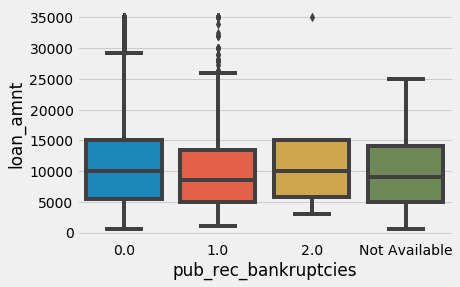

In [305]:
sns.boxplot(x=loan_cleaned['pub_rec_bankruptcies'],y=loan_cleaned['loan_amnt'])

#### By loan amount, "Not available" pub_rec_bankrupties similar to loan_amnt. Let us keep Not available as a seperate category

##### There are 50 cases where revol_util is missing. Revol_util is measure of “debt-to-limit ratio”. Since the percentage is very small, let us remove those rows from the data. Also, remove % from end of revol_util and make it float. Also, last_credit_pull_d has null for 2 rows, let us remove those rows as well

In [306]:

loan_cleaned['revol_util'] = loan_cleaned['revol_util'].str.rstrip('%').astype('float')
loan_cleaned=loan_cleaned.loc[loan_cleaned['revol_util'].notnull()]

In [307]:
loan_cleaned.loc[pd.isnull(loan_cleaned['last_pymnt_d']),'last_pymnt_d']='No payment'

In [308]:
loan_cleaned=loan_cleaned.loc[loan_cleaned['last_credit_pull_d'].notnull()]

#### inq_last_6mths is categorical value. Convert to category

In [309]:
loan_cleaned["inq_last_6mths"] = loan_cleaned["inq_last_6mths"].astype('category')

In [310]:
loan_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,has_last_delinq
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,0.00,Jan-15,171.62,May-16,0,True
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,0.00,Apr-13,119.66,Sep-13,0,True
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,0.00,Jun-14,649.91,May-16,0,True
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,16.97,Jan-15,357.48,Apr-16,0,False
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,0.00,May-16,67.79,May-16,0,False


#### There are no more missing values in the data.

#### int_rate is a float with % sign at end. It needs to be removed and it has to be converted to float

In [311]:
loan_cleaned['int_rate'] = loan_cleaned['int_rate'].str.rstrip('%').astype('float')
#loan_cleaned['total_acc'] = loan_cleaned['total_acc'].str.rstrip('%').astype('float')
loan_cleaned.to_csv('loan_cleaned.csv',index=False)

# Exploratory Data Analysis

### Distribution of Loan Status

Text(0.5,1,'Distribution of Loan Status')

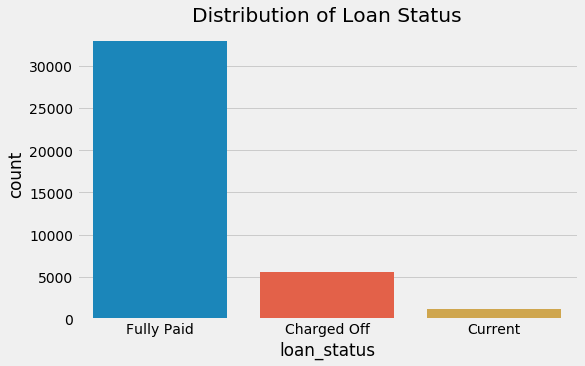

In [312]:
plt.figure(figsize=(8,5))
sns.countplot(loan_cleaned['loan_status'])
plt.title("Distribution of Loan Status")

### Distribution of loan amount and funded amount 

Text(0.5,1,'Distribution of Loan Amount and Funded Amount')

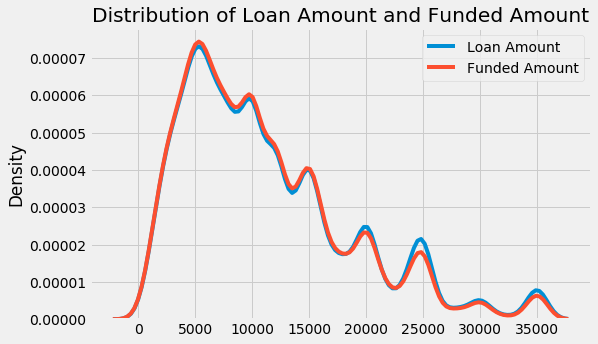

In [313]:
plt.figure(figsize=(8,5))
sns.kdeplot(loan_cleaned['loan_amnt'],label='Loan Amount')
sns.kdeplot(loan_cleaned['funded_amnt'],label='Funded Amount')
plt.ylabel("Density")
plt.title("Distribution of Loan Amount and Funded Amount")

As we can see from above plot that the distribution of Loan and Funded amount are very similar.
They are also very highly correlated.

### Let us create a function to plot KDE PLOT across dfferent loan status for Conitnuous Varibales

In [314]:
def kde(feature,data):
    plt.figure(figsize=(8,5))
    sns.kdeplot(data.loc[data['loan_status']=='Charged Off',feature],label= 'Status==Charged Off')
    sns.kdeplot(data.loc[data['loan_status']=='Fully Paid',feature],label= 'Status==Fully Paid')
    sns.kdeplot(data.loc[data['loan_status']=='Current',feature],label= 'Status==Current')

    plt.title("Distribution of "+feature+" vs Loan Status")
    plt.xlabel(feature)
    plt.ylabel('Density')
    

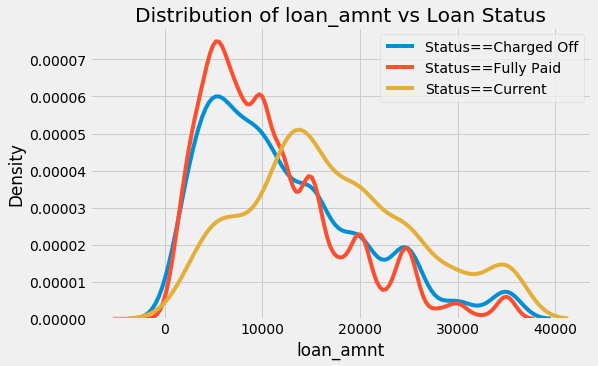

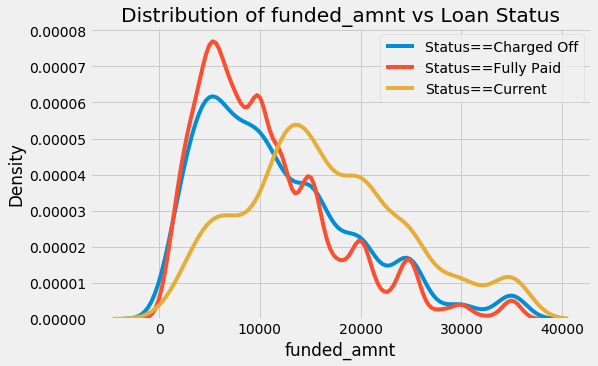

In [315]:

plt.figure(1)
kde('loan_amnt',loan_cleaned)

plt.figure(2)
kde('funded_amnt',loan_cleaned)

#### For higher loan amount and funded amount the rate of default is higher. Let us check this by calculating if their average(median) is different. Also, the mean is higher for those with current loan status 

In [316]:
mean_loan_amount_non_default=np.median(loan_cleaned.loc[loan_cleaned['loan_status']=='Fully Paid','loan_amnt'].values)
mean_loan_amount_default=np.median(loan_cleaned.loc[loan_cleaned['loan_status']=='Charged Off','loan_amnt'].values)

print("Median Loan Amount for Defaulters (Charged Off): "+ str(mean_loan_amount_default))
print("Median Loan Amount for Non-Defaulters (Fully Paid): "+str(mean_loan_amount_non_default))

Median Loan Amount for Defaulters (Charged Off): 10000.0
Median Loan Amount for Non-Defaulters (Fully Paid): 9600.0


#### From the median difference in loan amount for defaulters and non-defaulters also we can say that higher the loan amount, more chances of default

## Funded Amount By Investors 
The cases where funded amount by investors < Funded Amount, Lending club funded the rest of the amount.  Instead of using funded amount by investors. It would be better to have a field %fundedby investors 

In [317]:
loan_cleaned['funded_amnt_inv'].describe()

count    39665.000000
mean     10406.261853
std      7128.305768 
min      0.000000    
25%      5000.000000 
50%      8975.000000 
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

From the quartile distribution we can see that amount funded by investors is slightly skewed

Text(0.5,1,'Distribution of Amount Funded by Investors')

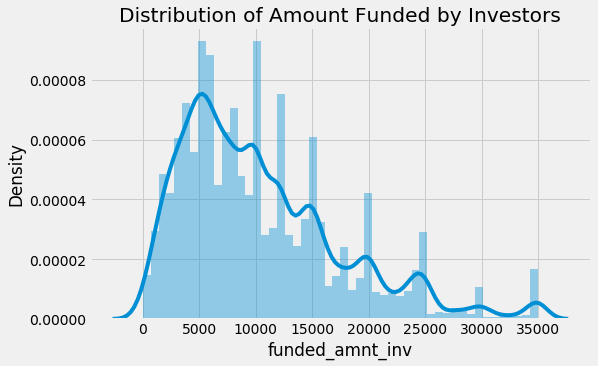

In [318]:
plt.figure(figsize=(8,5))
sns.distplot(loan_cleaned['funded_amnt_inv'],label='Funded Amount by Investors')
plt.ylabel("Density")
plt.title("Distribution of Amount Funded by Investors")

In [319]:
loan_cleaned['percent_funded_investors']=loan_cleaned['funded_amnt_inv']/loan_cleaned['funded_amnt']

In [320]:
loan_cleaned['percent_funded_investors'].describe()

count    39665.000000
mean     0.951144    
std      0.159448    
min      0.000000    
25%      0.986547    
50%      1.000000    
75%      1.000000    
max      1.000000    
Name: percent_funded_investors, dtype: float64

This value is highly skewed. So let us look at the distribution by splitting into two. 
First, let us look at distribution in cases where percent_funded_investors is less than 0.9

Text(0.5,1,'Percent Funded by Investors Less than 90%')

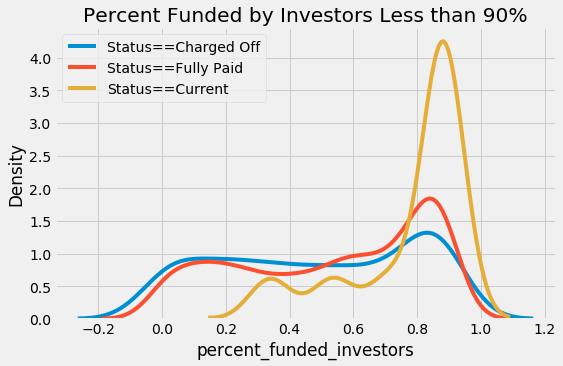

In [321]:
plt.figure(figsize=(8,5))
plt.figure(1)
kde('percent_funded_investors',loan_cleaned.loc[loan_cleaned['percent_funded_investors']<0.9])
plt.title("Percent Funded by Investors Less than 90%")

#plt.figure(2)
#kde('percent_funded_investors',loan_cleaned.loc[(loan_cleaned['percent_funded_investors']>=0.9) & (loan_cleaned['percent_funded_investors']<1)])
#plt.title("Percent Funded by Investors Greater than 90% but not 100%")


#### If amount funded by investors is less than 50% the chances of default are higher . Let us create a field which says, if lending club funded the loan. This happens in cases where investors do not fund the complete amount

### Let us create a function to get the Percentage of Charged off across a particular categorical variable

In [322]:
def getChargedOffPercentage(variable,hue_variable,count_variable):
    percent=(loan_cleaned.groupby([variable,hue_variable])[count_variable].count())
    count_target=loan_cleaned.groupby([variable])[count_variable].count().reset_index().rename(columns={count_variable:"Variable_Count"})
    percent=percent.reset_index().rename(columns={count_variable:'count_hue_variable'})
    dat=pd.merge(percent,count_target,on=variable)
    dat['Percentage']=(dat['count_hue_variable']/dat['Variable_Count'])*100
    chargedOff=dat[dat['loan_status']=='Charged Off']
    return chargedOff

In [323]:
loan_cleaned['has_lending_club_invested']=loan_cleaned.apply(lambda row:row['funded_amnt_inv']<row['funded_amnt'],axis=1)

### What is the default rate when lending club invests vs when it does not invest?

In [324]:
default_rate=loan_cleaned.groupby(['has_lending_club_invested','loan_status'])['id'].count().reset_index()

Text(0.5,1,'Distribution of Loans when Lending Club Invested')

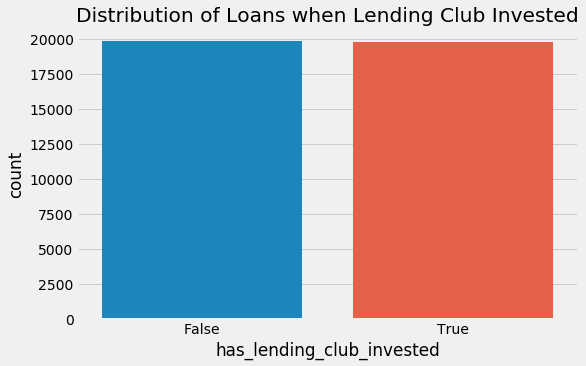

In [325]:
default_rate=default_rate.rename(columns={'id':'count'})
plt.figure(figsize=(8,5))
sns.countplot(loan_cleaned['has_lending_club_invested'])
plt.title("Distribution of Loans when Lending Club Invested")


Text(0.5,1,'Percentage Charged off vs Has Lending Club Invested or Not')

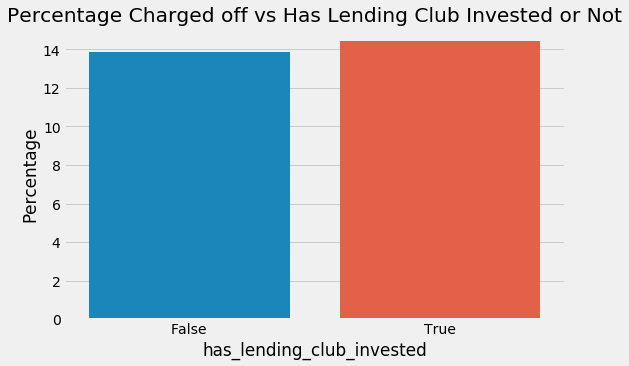

In [326]:
chargedoff_lendingclub_invested=getChargedOffPercentage('has_lending_club_invested','loan_status','id')
plt.figure(figsize=(8,5))
sns.barplot(data=chargedoff_lendingclub_invested,x='has_lending_club_invested',y='Percentage')
plt.title("Percentage Charged off vs Has Lending Club Invested or Not")

#### Percentage of default is slighly higher when lending club has invested. But, using percent_funded_investors is a better measure

## Annual Income 

In [327]:
loan_cleaned['annual_inc'].describe()

count    3.966500e+04
mean     6.899756e+04
std      6.379042e+04
min      4.000000e+03
25%      4.051464e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

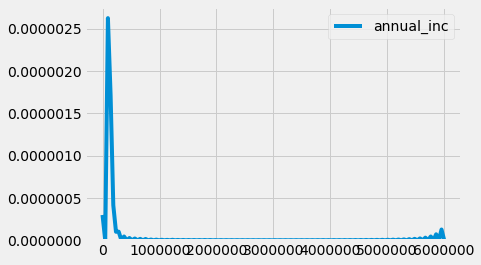

In [328]:
sns.kdeplot(loan_cleaned['annual_inc'])

The distribution is highly skewed and follow power law - few clients with high income but lot of clients with low income. 

In [329]:
loan_cleaned['Log_annual_inc']=loan_cleaned['annual_inc'].apply(lambda x:math.log(x))

Text(0,0.5,'Density')

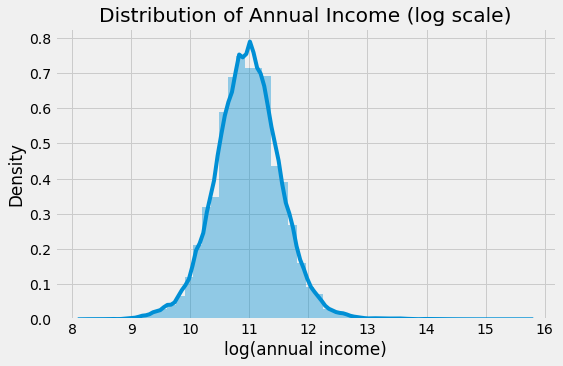

In [330]:
plt.figure(figsize=(8,5))
sns.distplot(loan_cleaned['Log_annual_inc'])
plt.title("Distribution of Annual Income (log scale)")
plt.xlabel("log(annual income)")
plt.ylabel("Density")

log of annual income follows a normal distribution. Let us understand how loan status varies across log of Annual Income

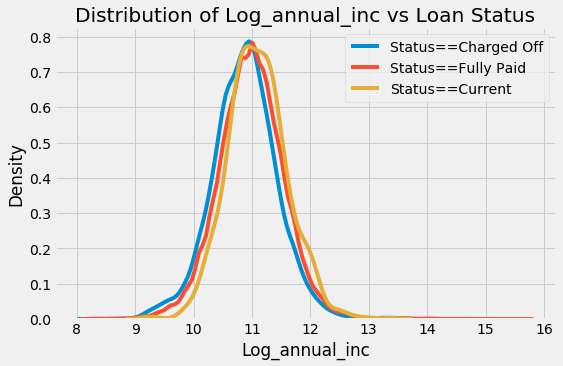

In [331]:
kde('Log_annual_inc',loan_cleaned)

#### Lower Annual Income ,means a higher default rate. What percent of Income is the loan amount can also be an important measure. Let us check

In [332]:
loan_cleaned['percent_of_annual_income']=loan_cleaned['loan_amnt']/loan_cleaned['annual_inc']

Text(0,0.5,'Density')

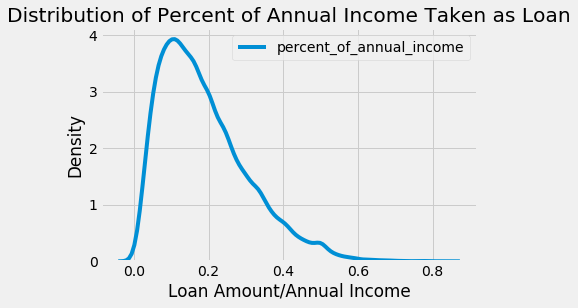

In [333]:
sns.kdeplot(loan_cleaned['percent_of_annual_income'])
plt.title("Distribution of Percent of Annual Income Taken as Loan")
plt.xlabel("Loan Amount/Annual Income")
plt.ylabel("Density")

### This is skewed. In most case the Loan amount is a small fraction of Annual Income.

Text(0.5,0,'Loan Amount/Annual Income')

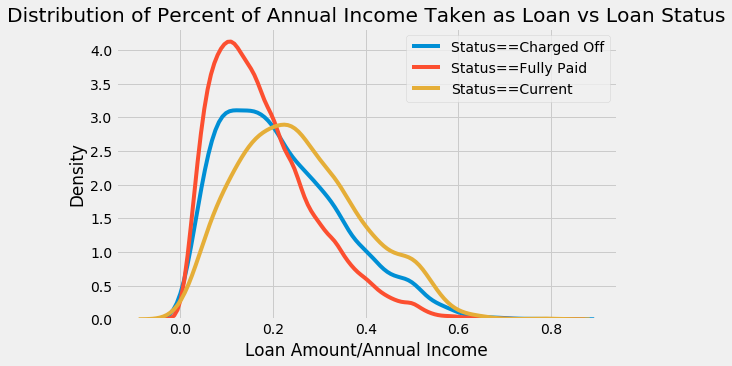

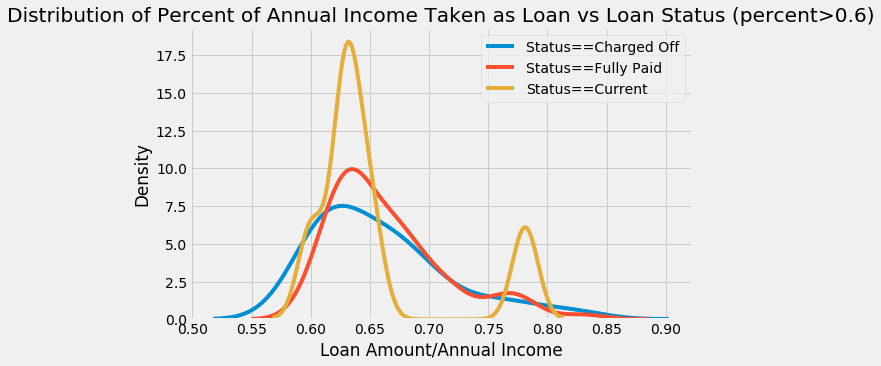

In [334]:
plt.figure(1)
kde('percent_of_annual_income',loan_cleaned)
plt.title("Distribution of Percent of Annual Income Taken as Loan vs Loan Status")
plt.xlabel("Loan Amount/Annual Income")

plt.figure(2)
kde('percent_of_annual_income',loan_cleaned[loan_cleaned['percent_of_annual_income']>0.6])
plt.title("Distribution of Percent of Annual Income Taken as Loan vs Loan Status (percent>0.6)")
plt.xlabel("Loan Amount/Annual Income")


Higher the ratio of Loan Amount to Annual Income, hgiher the chances of default

 ## Term of Loan
 
 This is either 36 months or 60 months

In [335]:
loan_cleaned['term_month']=loan_cleaned['term'].apply(lambda x:int(x.split("months")[0]))
loan_cleaned['term_years']=loan_cleaned['term_month']/12
loan_cleaned['term_month'].value_counts()

36    29047
60    10618
Name: term_month, dtype: int64

Text(0.5,1,'Distribution of Term of Loan')

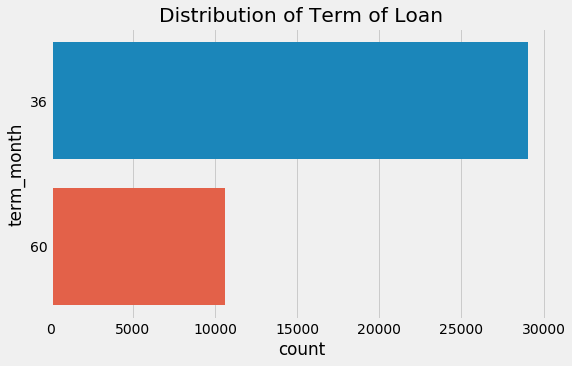

In [336]:
plt.figure(figsize=(8,5))
sns.countplot(y=loan_cleaned['term_month'])
plt.title("Distribution of Term of Loan")

   term_month  loan_status  count_hue_variable  Variable_Count  Percentage
0  36          Charged Off  3213                29047           11.061383 
2  60          Charged Off  2397                10618           22.574873 


Text(0.5,1,'Percentage Charged off vs Loan Term')

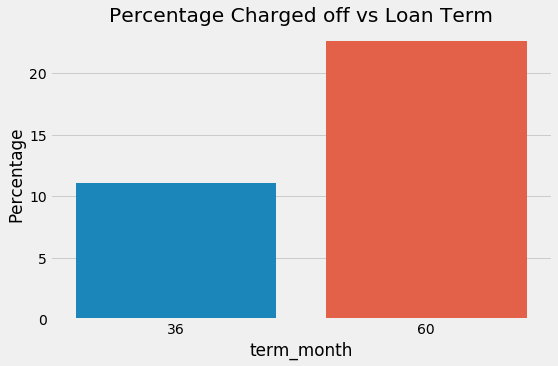

In [337]:
chargedOff_term=getChargedOffPercentage('term_month','loan_status','id')
print(chargedOff_term)
plt.figure(figsize=(8,5))
sns.barplot(data=chargedOff_term,x='term_month',y='Percentage')
plt.title("Percentage Charged off vs Loan Term")

#### Percentage of Default (Charged off) is higher when term is 60 months. 22% default when term is 60 months compared to  11% default when term is 36 months

## Intrest Rate

In [338]:
loan_cleaned['int_rate'].describe()

count    39665.000000
mean     12.016733   
std      3.723866    
min      5.420000    
25%      9.250000    
50%      11.830000   
75%      14.540000   
max      24.590000   
Name: int_rate, dtype: float64

Text(0,0.5,'Density')

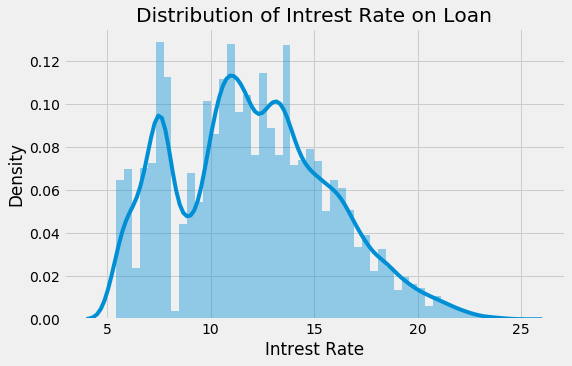

In [339]:
plt.figure(figsize=(8,5))
sns.distplot(loan_cleaned['int_rate'])
plt.title("Distribution of Intrest Rate on Loan")
plt.xlabel("Intrest Rate")
plt.ylabel("Density")

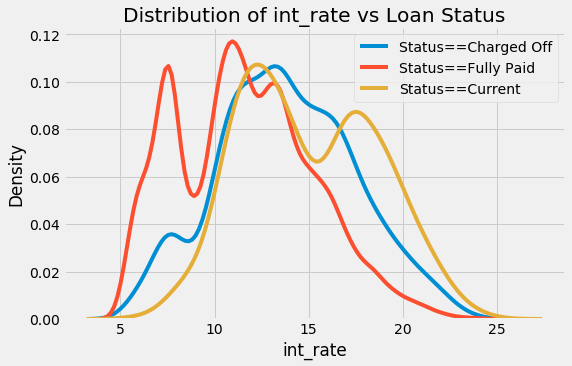

In [340]:
kde('int_rate',loan_cleaned)

#### For Charged off loans, the intrest rate on loan is higher, compared to Fully paid or Current

## Installment

This is monthly payment paid by client towards the loan

In [341]:
loan_cleaned['installment'].describe()

count    39665.000000
mean     324.782255  
std      208.881347  
min      15.690000   
25%      167.080000  
50%      280.610000  
75%      430.780000  
max      1305.190000 
Name: installment, dtype: float64

Text(0,0.5,'Density')

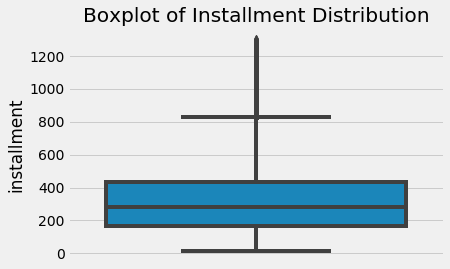

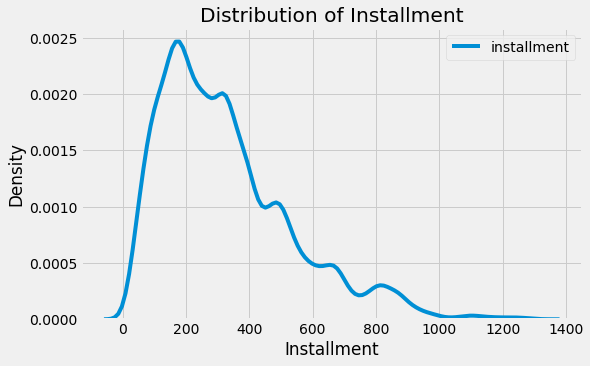

In [342]:

plt.figure(1)
sns.boxplot(y=loan_cleaned['installment'])
plt.title("Boxplot of Installment Distribution")

plt.figure(2)
plt.figure(figsize=(8,5))
sns.kdeplot(loan_cleaned['installment'])
plt.title("Distribution of Installment")
plt.xlabel("Installment")
plt.ylabel("Density")


#### Installment amount is skewed.

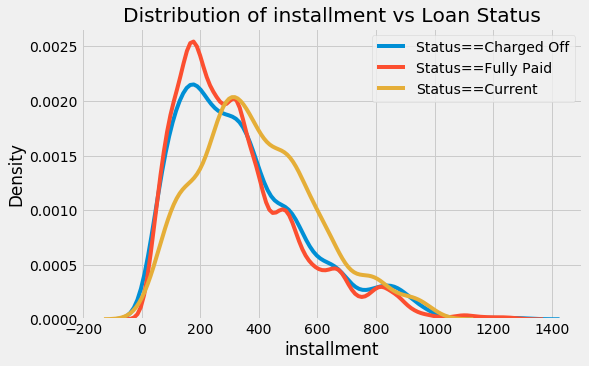

In [343]:
kde('installment',loan_cleaned)

#### Installment amount is higher for both the Charged off and Current Loans compared to Fully paid.What percent of annual income is paid as installment can be a useful feature

In [344]:
loan_cleaned['percent_income_paid_in_installments']=loan_cleaned['installment']*12/loan_cleaned['annual_inc']

Text(0,0.5,'Density')

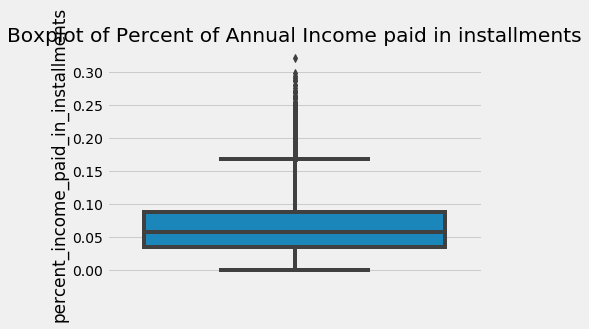

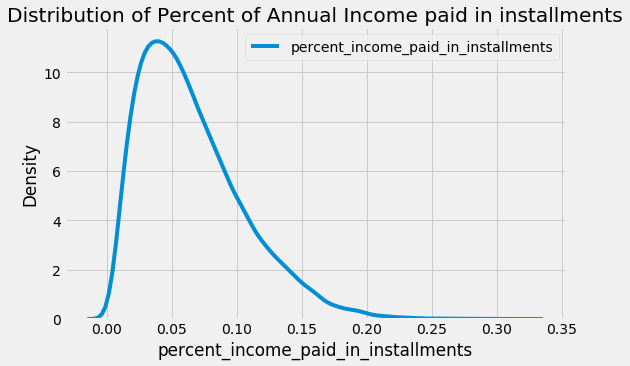

In [345]:
plt.figure(1)
sns.boxplot(y=loan_cleaned['percent_income_paid_in_installments'])
plt.title("Boxplot of Percent of Annual Income paid in installments")

plt.figure(2)
plt.figure(figsize=(8,5))
sns.kdeplot(loan_cleaned['percent_income_paid_in_installments'])
plt.title("Distribution of Percent of Annual Income paid in installments")
plt.xlabel("percent_income_paid_in_installments")

plt.ylabel("Density")


#### Most loans have lower percentage of annual income going towards installments

Text(0.5,1,'Distribution of Percent of Annual Income paid in installments (>25%) vs Loan Status')

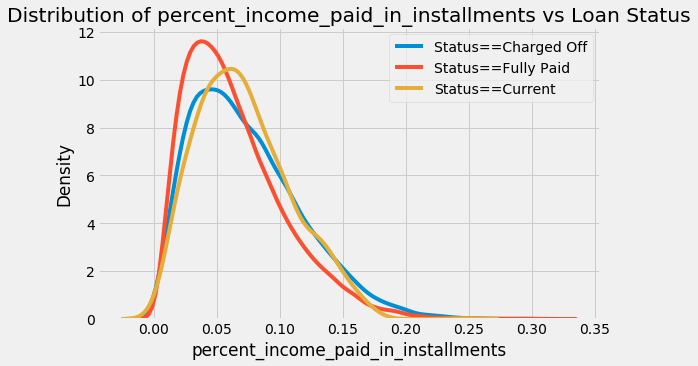

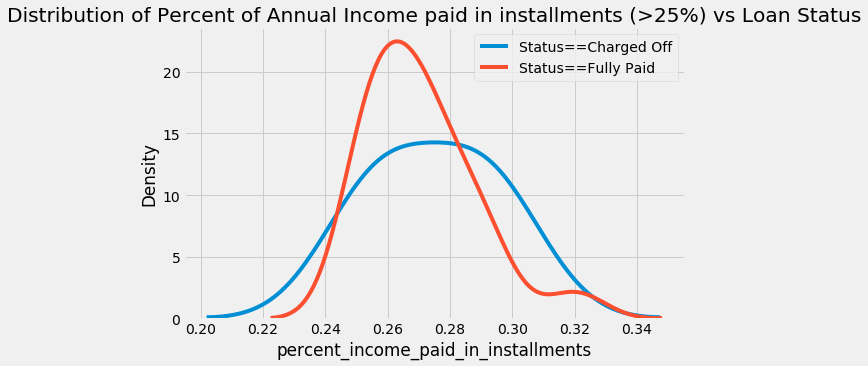

In [346]:
plt.figure(1)
kde('percent_income_paid_in_installments',loan_cleaned)

plt.figure(2)
kde('percent_income_paid_in_installments',loan_cleaned[loan_cleaned['percent_income_paid_in_installments']>0.25])
plt.title("Distribution of Percent of Annual Income paid in installments (>25%) vs Loan Status")

#### There are no current loans which have more than 25% of income paid towards installments. But, if more than 25% paid towards installments, default rate is higher

## Grade

Text(0.5,1,'Distribution of Grade')

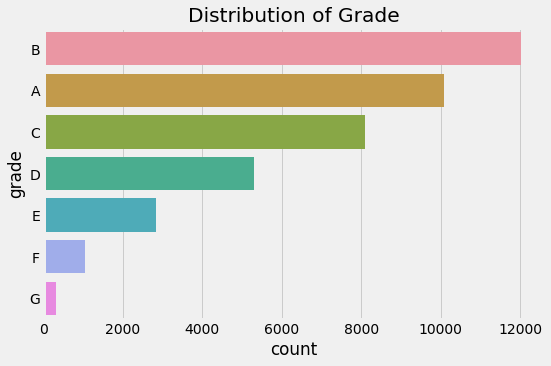

In [347]:
plt.figure(figsize=(8,5))
sns.countplot(y=loan_cleaned['grade'],order=loan_cleaned['grade'].value_counts().sort_values(ascending=False).index)
plt.title("Distribution of Grade")

##### Most loans are B Grade Loans. 

   grade  loan_status  count_hue_variable  Variable_Count  Percentage
0   A     Charged Off  602                 10084           5.969853  
3   B     Charged Off  1424                12018           11.848893 
6   C     Charged Off  1343                8084            16.613063 
9   D     Charged Off  1115                5291            21.073521 
12  E     Charged Off  711                 2831            25.114800 
15  F     Charged Off  316                 1043            30.297220 
18  G     Charged Off  99                  314             31.528662 


Text(0.5,1,'Percentage Charged off vs Grade')

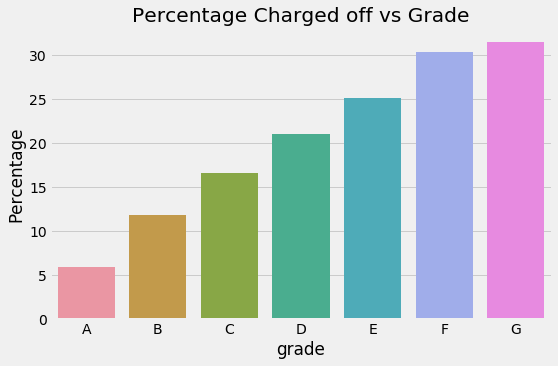

In [348]:
chargedOff_grade=getChargedOffPercentage('grade','loan_status','id')
print(chargedOff_grade)
plt.figure(figsize=(8,5))
sns.barplot(data=chargedOff_grade,x='grade',y='Percentage')
plt.title("Percentage Charged off vs Grade")

#### As the grade goes from A to G, the percentage of default increases.

## Employee Length 

This indicates how long a client has been employed.Generally, if you have been employed for a long time then you have less chances of default

In [349]:
loan_cleaned['emp_length'].value_counts()

10+ years    8878
< 1 year     4570
2 years      4383
3 years      4091
4 years      3429
5 years      3277
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Missing      1072
Name: emp_length, dtype: int64

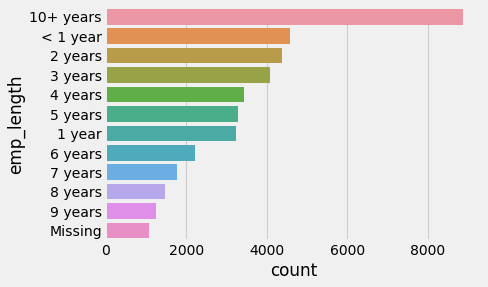

In [350]:
sns.countplot(y=loan_cleaned['emp_length'],order=loan_cleaned['emp_length'].value_counts().sort_values(ascending=False).index)

##### Instead of having so many groups, let us group the employee length into Low, medium and high

In [351]:
def Experience(emp_length):
    if (emp_length=="< 1 year" or emp_length=='1 year' or emp_length=='2 years' or emp_length=='3 years' or emp_length=='4 years'):
        return 'Low Experience'
    elif ( emp_length=='5 years' or emp_length=='6 years' or emp_length=='7 years' or emp_length=='8 years'):
        return 'Medium Experience'
    elif (emp_length=='9 years' or emp_length=='10+ years'):
        return 'High Experience'
    else:
        return 'Missing'

In [352]:
loan_cleaned['experience']=loan_cleaned['emp_length'].apply(lambda x:Experience(x))

Text(0.5,1,'Distribution of Experience')

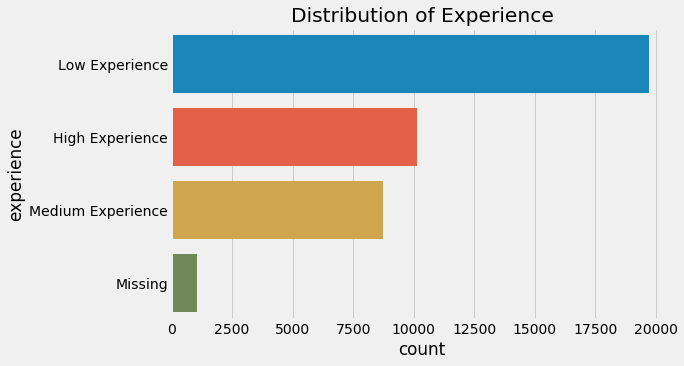

In [353]:
plt.figure(figsize=(8,5))
sns.countplot(y=loan_cleaned['experience'],order=loan_cleaned['experience'].value_counts().sort_values(ascending=False).index)
plt.title("Distribution of Experience")

          experience  loan_status  count_hue_variable  Variable_Count  \
0  High Experience    Charged Off  1488                10136            
3  Low Experience     Charged Off  2669                19707            
6  Medium Experience  Charged Off  1226                8750             
9  Missing            Charged Off  227                 1072             

   Percentage  
0  14.680347   
3  13.543411   
6  14.011429   
9  21.175373   


Text(0.5,1,'Percentage Charged off vs Experience')

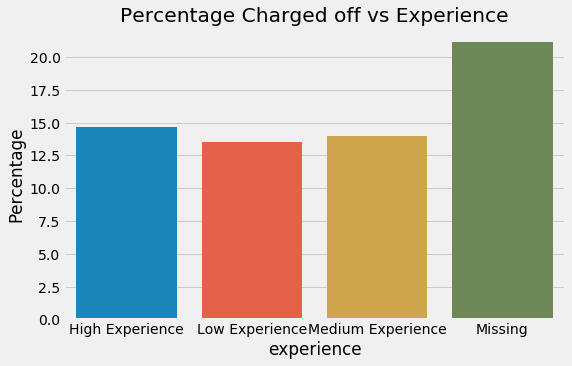

In [354]:
chargedOff_experience=getChargedOffPercentage('experience','loan_status','id')
print(chargedOff_experience)
plt.figure(figsize=(8,5))
sns.barplot(data=chargedOff_experience,x='experience',y='Percentage')
plt.title("Percentage Charged off vs Experience")

#### Default is higher for those with Missing Experience and sloghtly higher for High Experience

## Home Ownership

Text(0.5,1,'Distribution of Home Ownership')

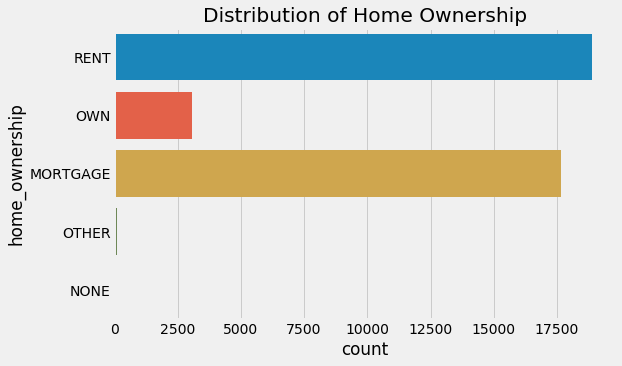

In [355]:
plt.figure(figsize=(8,5))
sns.countplot(y=loan_cleaned['home_ownership'])
plt.title("Distribution of Home Ownership")

### Most clients have home taken on Rent or Mortgage. We can group other and none into Other category

  home_ownership  loan_status  count_hue_variable  Variable_Count  Percentage
0  MORTGAGE       Charged Off  2323                17647           13.163711 
4  OTHER          Charged Off  18                  96              18.750000 
6  OWN            Charged Off  441                 3053            14.444808 
9  RENT           Charged Off  2828                18866           14.989929 


Text(0.5,1,'Percentage Charged off vs Home Ownership')

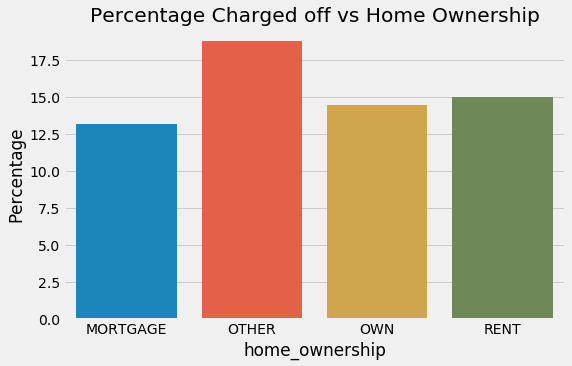

In [356]:
chargedOff_home_ownership=getChargedOffPercentage('home_ownership','loan_status','id')
print(chargedOff_home_ownership)
plt.figure(figsize=(8,5))
sns.barplot(data=chargedOff_home_ownership,x='home_ownership',y='Percentage')
plt.title("Percentage Charged off vs Home Ownership")

Higher percentage of default in Other and Rent

## Verification Status

Text(0.5,1,'Distribution of Verification Status')

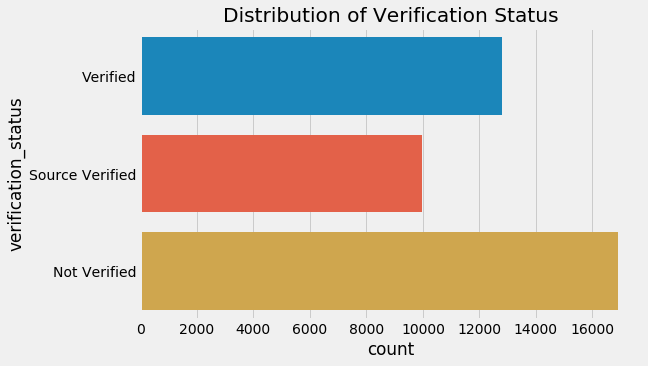

In [357]:
plt.figure(figsize=(8,5))
sns.countplot(y=loan_cleaned['verification_status'])
plt.title("Distribution of Verification Status")

  verification_status  loan_status  count_hue_variable  Variable_Count  \
0  Not Verified        Charged Off  2134                16890            
3  Source Verified     Charged Off  1431                9976             
6  Verified            Charged Off  2045                12799            

   Percentage  
0  12.634695   
3  14.344427   
6  15.977811   


Text(0.5,1,'Percentage Charged off vs Verification Status')

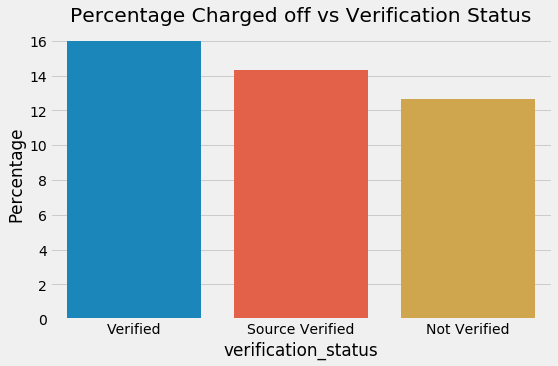

In [358]:
chargedOff_verification=getChargedOffPercentage('verification_status','loan_status','id')
print(chargedOff_verification)
plt.figure(figsize=(8,5))
sns.barplot(data=chargedOff_verification,x='verification_status',y='Percentage',order=['Verified','Source Verified','Not Verified'])
plt.title("Percentage Charged off vs Verification Status")

### When verified the percentage of default slightly higer than for Those which are not verified. 

In [359]:
import time
from datetime import datetime,timedelta

In [360]:
loan_cleaned['issue_date']=pd.to_datetime(loan_cleaned['issue_d'],format='%b-%y')

In [361]:
#loan_cleaned['issue_date']=loan_cleaned['issue_date'].apply(lambda x:x.strftime("%d-%m-%Y"))

In [362]:
time_df=loan_cleaned.groupby('issue_date')['id'].count()

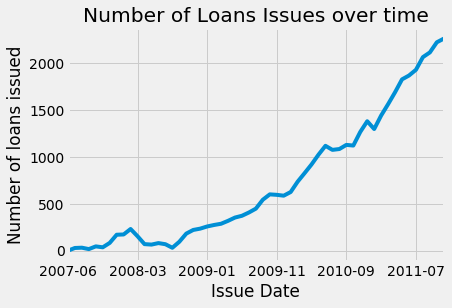

In [363]:
import matplotlib as mpl
import matplotlib.dates as mdates
def myFormatter(x, pos):
    dates=(datetime.strptime('2007-06','%Y-%m') + timedelta(x*365/12)).date()
    #print(dates)
    dates=datetime.strftime(dates,"%Y-%m")
    return dates

fig, ax = plt.subplots()
sns.tsplot(time_df)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(myFormatter))
plt.title("Number of Loans Issues over time")
plt.xlabel("Issue Date")
plt.ylabel("Number of loans issued")
plt.show()


#### Over the Years number of loans have increased exponentially

## Purpose of Loan

Text(0.5,1,'Distribution of Purpose of Loan')

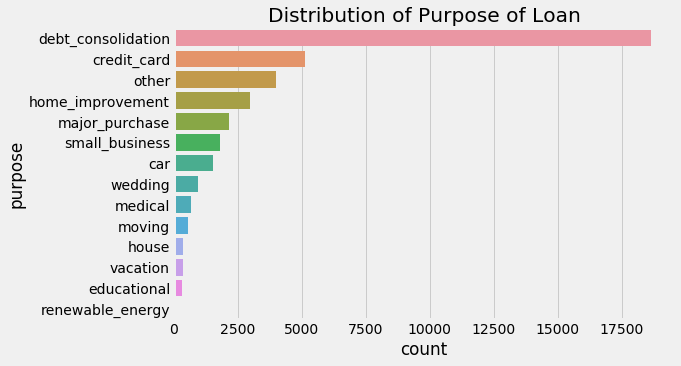

In [364]:
plt.figure(figsize=(8,5))
sns.countplot(y=loan_cleaned['purpose'],order=loan_cleaned['purpose'].value_counts().sort_values(ascending=False).index)
plt.title("Distribution of Purpose of Loan")

#### Most loans are taken for Debt Consolidation

               purpose  loan_status  count_hue_variable  Variable_Count  \
0   car                 Charged Off  159                 1547             
3   credit_card         Charged Off  541                 5128             
6   debt_consolidation  Charged Off  2762                18629            
9   educational         Charged Off  56                  322              
11  home_improvement    Charged Off  344                 2971             
14  house               Charged Off  59                  381              
17  major_purchase      Charged Off  221                 2181             
20  medical             Charged Off  105                 691              
23  moving              Charged Off  92                  581              
26  other               Charged Off  629                 3979             
29  renewable_energy    Charged Off  19                  103              
32  small_business      Charged Off  474                 1826             
35  vacation            C

Text(0.5,1,'Percentage Charged off vs Purpose of Loan')

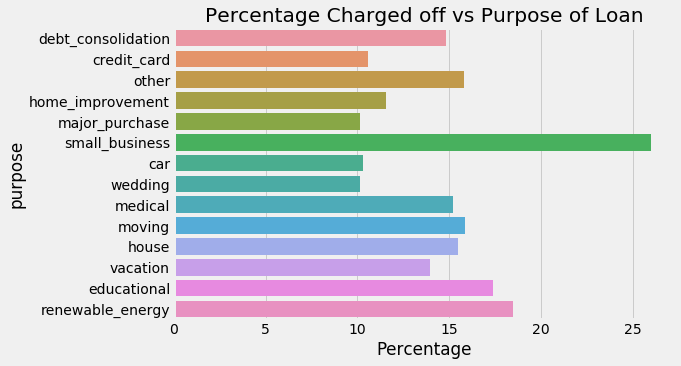

In [365]:
chargedOff_purpose=getChargedOffPercentage('purpose','loan_status','id')
print(chargedOff_purpose)
plt.figure(figsize=(8,5))
sns.barplot(data=chargedOff_purpose,y='purpose',x='Percentage',order=loan_cleaned['purpose'].value_counts().sort_values(ascending=False).index)
plt.title("Percentage Charged off vs Purpose of Loan")

#### Small Business has a high Default rate.

## DTI

Text(0,0.5,'Density')

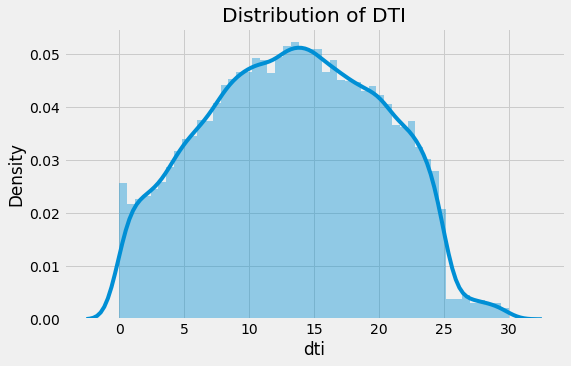

In [366]:
plt.figure(figsize=(8,5))
sns.distplot(loan_cleaned['dti']).set_title("Distribution of DTI")
plt.ylabel("Density")

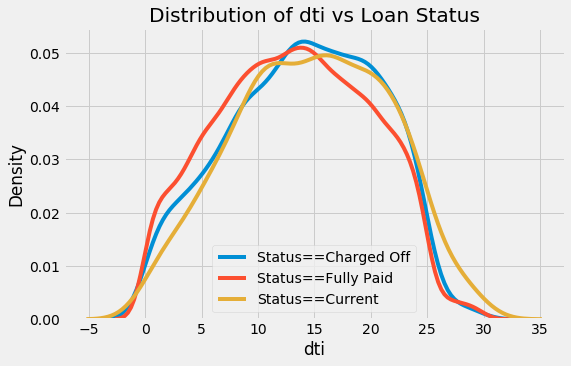

In [367]:

kde('dti',loan_cleaned)

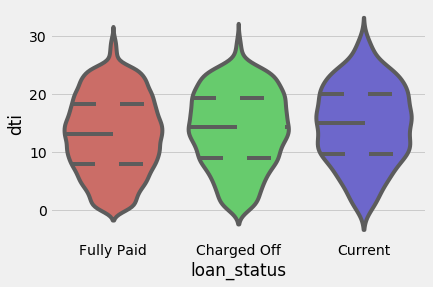

In [368]:
sns.violinplot(x='loan_status',y="dti", data=loan_cleaned, 
               inner="quartile", palette="hls")

### The meadian is slighlty higher for Charged off compared to Fully Paid

## Address State

In [369]:
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='aiswaryaram', api_key='GKMfBIxRsRhvjwStEg9t')

In [370]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
count_state=loan_cleaned.groupby("addr_state")['id'].count().reset_index().rename(columns={'id':'#loans'})
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = count_state['addr_state'],
        z = count_state['#loans'].astype(float),
        locationmode = 'USA-states',
        text = count_state['#loans'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Loans")
        ) ]

layout = dict(
        title = 'Distribution of Number of Loans',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

#### The number of Loans are very high is CA

In [371]:
variable='addr_state'
hue_variable='loan_status'
count_variable='id'
chargedOff=getChargedOffPercentage(variable,hue_variable,count_variable)


In [372]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = chargedOff['addr_state'],
        z = chargedOff['Percentage'].astype(float),
        locationmode = 'USA-states',
        text = chargedOff['addr_state']+" "+chargedOff['Percentage'].astype(str),
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% Loans Charged Off")
        ) ]

layout = dict(
        title = 'Distribution of Charged off Loans',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

#### 60% of the Loans in NE are defaulted(NE has only 5 loans total). While CA has only 15% default rate. 

Text(0,0.5,'US States')

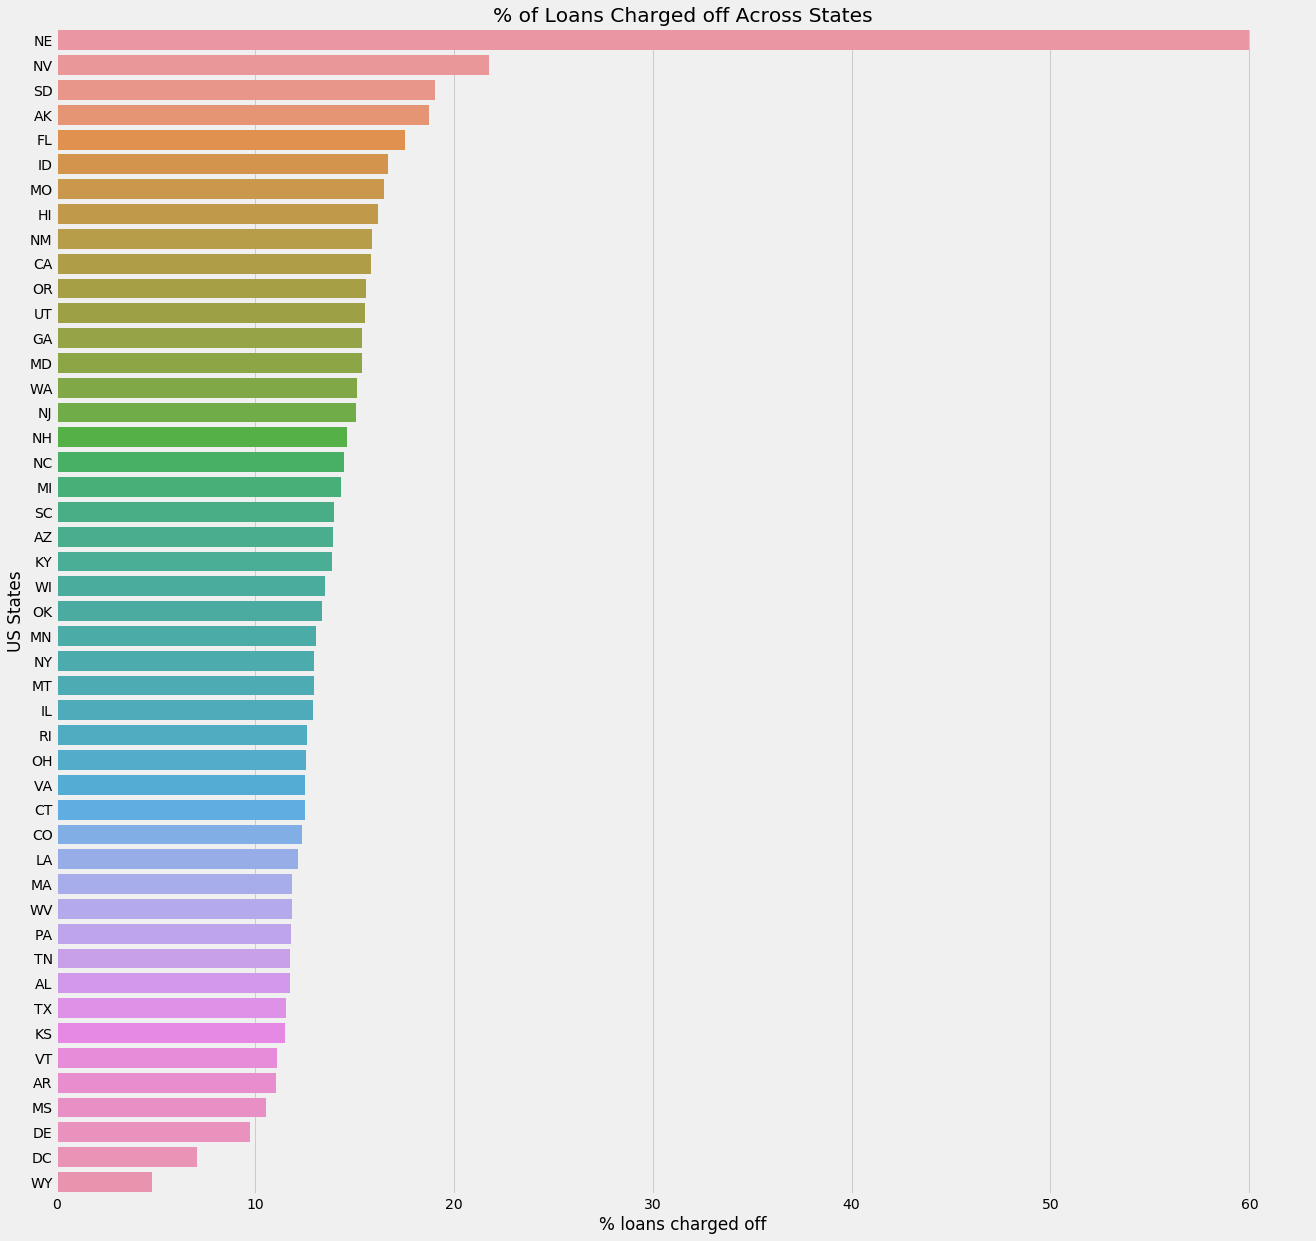

In [373]:

plt.figure(figsize=(20,20))
chargedOff=chargedOff.sort_values(['Percentage'],ascending=False)
sns.barplot(y='addr_state',x='Percentage',data=chargedOff)
plt.title("% of Loans Charged off Across States")
plt.xlabel("% loans charged off")
plt.ylabel("US States")

## delinq_2yrs 
The number of times, the borrower has not paid for 30+ days in the last two years

In [374]:
loan_cleaned['delinq_2yrs'].describe()

count    39665.000000
mean     0.146502    
std      0.491601    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      11.000000   
Name: delinq_2yrs, dtype: float64

Max is very high. Most stats are 0. 

In [375]:
loan_cleaned['is_delinq_2yrs_zero']=loan_cleaned['delinq_2yrs'].apply(lambda x:x==0.0)


Text(0.5,1,'Distribution of zero and non-zero Delinq')

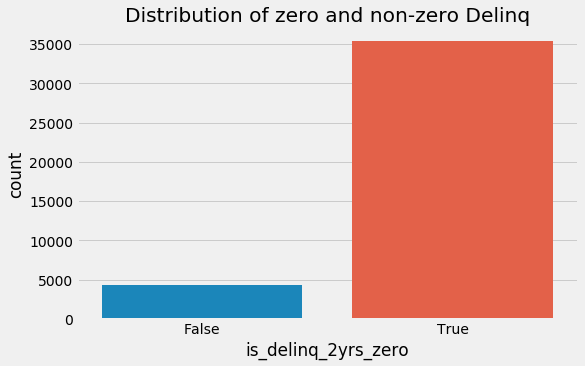

In [376]:
plt.figure(figsize=(8,5))
sns.countplot(loan_cleaned['is_delinq_2yrs_zero'])
plt.title("Distribution of zero and non-zero Delinq")

89% of the loans have delinq_2_yrs zero. Is Default rate higher for non zero delinq_2_yrs_zero

In [377]:
chargedOff_delinq=getChargedOffPercentage('is_delinq_2yrs_zero','loan_status','id')
chargedOff_delinq

,is_delinq_2yrs_zero,loan_status,count_hue_variable,Variable_Count,Percentage
0,False,Charged Off,689,4308,15.993500
3,True,Charged Off,4921,35357,13.918036


Text(0.5,1,'% Charged Off Loans - For Zero vs Non-Zero Delinq 2 Years')

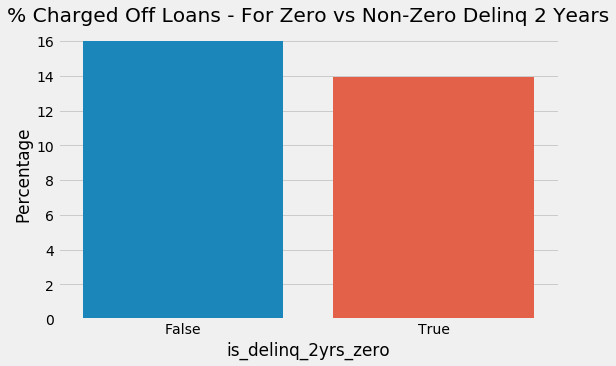

In [378]:
plt.figure(figsize=(8,5))
sns.barplot(x='is_delinq_2yrs_zero',y='Percentage',data=chargedOff_delinq)
plt.title("% Charged Off Loans - For Zero vs Non-Zero Delinq 2 Years")

#### The Default is slightly higher when Delinq 2years is non-zero. This makes sense as if you have not paid on time before your tendency to default is higher. Is there also tendency to default hgher for higher values of delinq_2yrs?

In [379]:
non_zero_delinq=loan_cleaned[loan_cleaned['is_delinq_2yrs_zero']==False]

Text(0.5,1,'Distribution of Delinq_2yrs(non-zero) vs Loan Status')

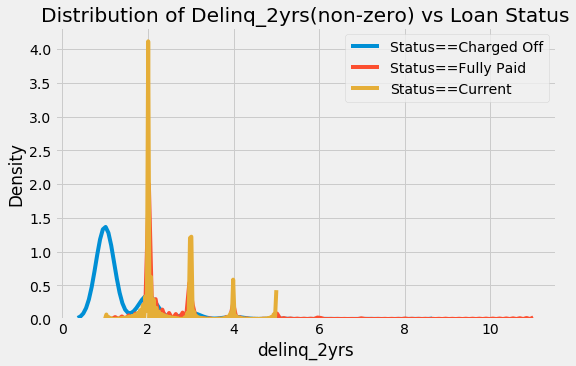

In [380]:
kde('delinq_2yrs',non_zero_delinq)
plt.title("Distribution of Delinq_2yrs(non-zero) vs Loan Status")

#### If delinq <2 higher chances of default

## inq_last_6mths
The number of inquires is last 6 months.

In [381]:
loan_cleaned['inq_last_6mths'].describe()

count     39665
unique    9    
top       0    
freq      19278
Name: inq_last_6mths, dtype: int64

Text(0.5,1,'Distribution of Number of Inquiries in Last 6 Months')

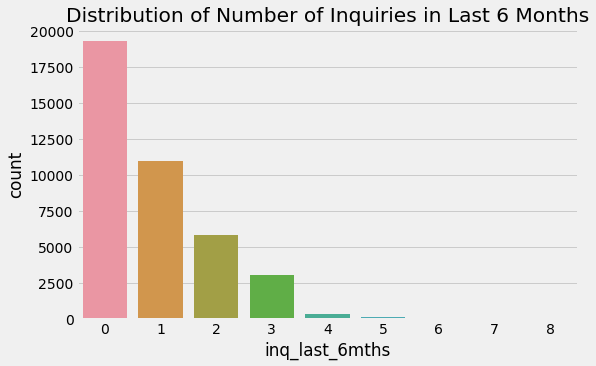

In [382]:
plt.figure(figsize=(8,5))
sns.countplot(loan_cleaned['inq_last_6mths'])
plt.title("Distribution of Number of Inquiries in Last 6 Months")

In [383]:
variable='inq_last_6mths'
hue_variable='loan_status'
count_variable='id'
chargedOff_inq=getChargedOffPercentage(variable,hue_variable,count_variable)


Text(0.5,1,'% of Charged off vs Number of Inquiries in Last 6 months')

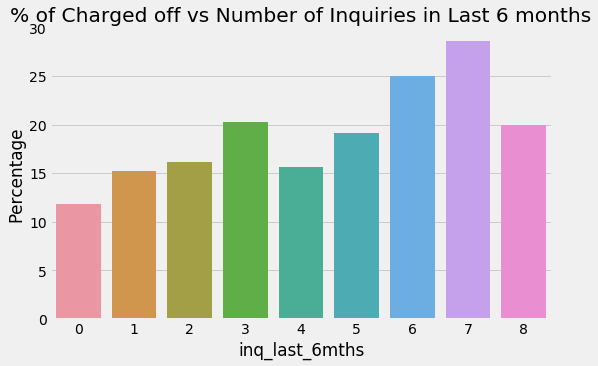

In [384]:
plt.figure(figsize=(8,5))
sns.barplot(x='inq_last_6mths',y='Percentage',data=chargedOff_inq)
plt.title("% of Charged off vs Number of Inquiries in Last 6 months")

## Open_acc

The number of credit taken by the borrower. If a borrower takes a lot of credit, then higher risk. Let us verify using data

In [385]:
loan_cleaned['open_acc'].describe()

count    39665.000000
mean     9.300441    
std      4.398881    
min      2.000000    
25%      6.000000    
50%      9.000000    
75%      12.000000   
max      44.000000   
Name: open_acc, dtype: float64

Text(0,0.5,'Density')

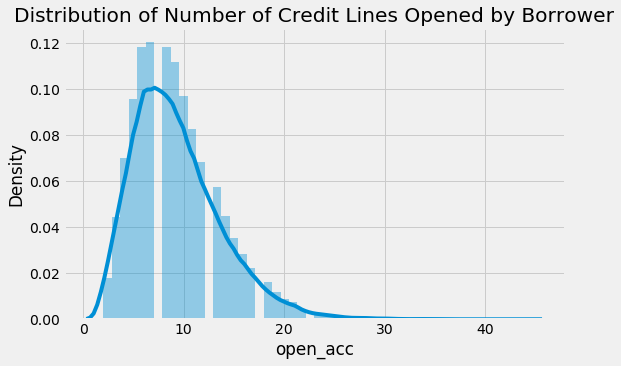

In [386]:
plt.figure(figsize=(8,5))
sns.distplot(loan_cleaned['open_acc'])
plt.title("Distribution of Number of Credit Lines Opened by Borrower")
plt.ylabel("Density")

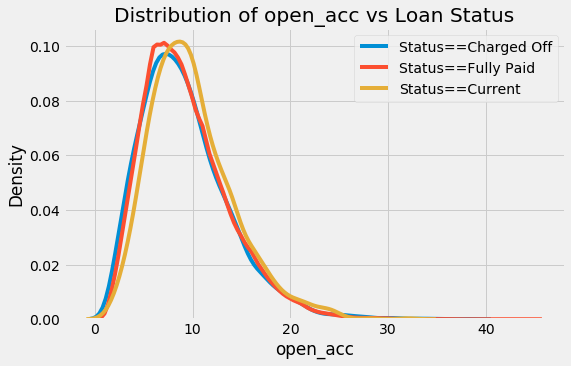

In [387]:
kde('open_acc',loan_cleaned)

#### For Current loans, the mean number of credit lines open is higher. But for Fully paid and Charged off the mean is ammost the same

## pub_rec
Number of Derogatory Public Records - higher number, higher risk?

Text(0.5,1,'Distribution of Number of Derogatory Public Records')

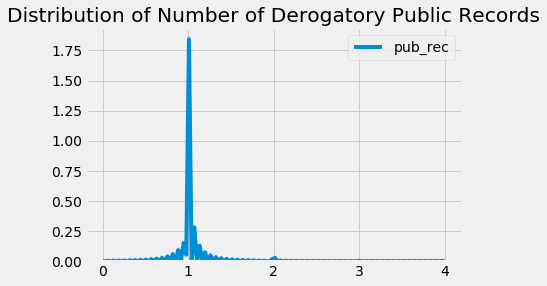

In [388]:
sns.kdeplot(loan_cleaned['pub_rec'])
plt.title("Distribution of Number of Derogatory Public Records")

In [389]:
loan_cleaned['pub_rec'].describe()

count    39665.000000
mean     0.055086    
std      0.237252    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      4.000000    
Name: pub_rec, dtype: float64

### Has a lot of zeros. Create field has any public record?

In [390]:
loan_cleaned['has_pub_rec']=loan_cleaned['pub_rec'].apply(lambda x:x>0)

Text(0.5,1,'Distribution of Borrowers with Public Record')

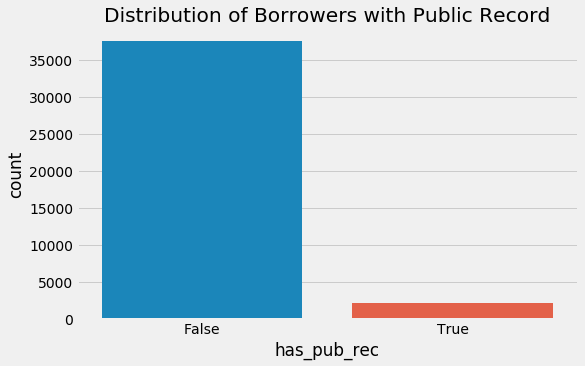

In [391]:
plt.figure(figsize=(8,5))
sns.countplot(loan_cleaned['has_pub_rec'])
plt.title("Distribution of Borrowers with Public Record")

### Around 90% of the borrowers dont have any public derogratory record

In [392]:
chargedOff_pub_rec=getChargedOffPercentage('has_pub_rec','loan_status','id')
chargedOff_pub_rec

,has_pub_rec,loan_status,count_hue_variable,Variable_Count,Percentage
0,False,Charged Off,5143,37551,13.696040
3,True,Charged Off,467,2114,22.090823


Text(0.5,1,'Percentage of Default when There is a Derogatory Public Record')

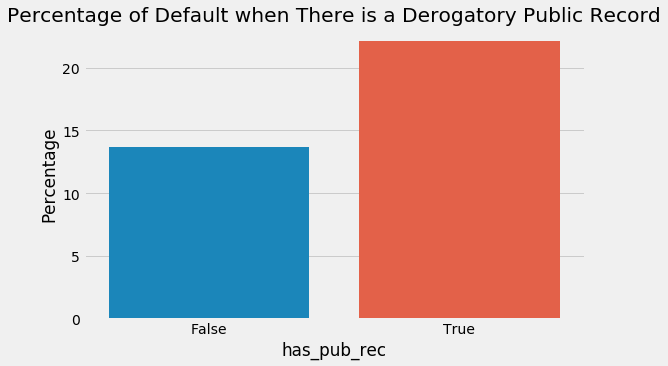

In [393]:
plt.figure(figsize=(8,5))
sns.barplot(x='has_pub_rec',y='Percentage',data=chargedOff_pub_rec)
plt.title("Percentage of Default when There is a Derogatory Public Record")

##### Our hypothesis was right, if there is a derogatory public record there is a higher chance of default

## pub_rec_bankruptcies
This is number of public record of Bankruptices.

In [394]:
loan_cleaned['pub_rec_bankruptcies'].describe()

count     39665.0
unique    4.0    
top       0.0    
freq      37289.0
Name: pub_rec_bankruptcies, dtype: float64

In [395]:
loan_cleaned['pub_rec_bankruptcies'].value_counts()

0.0              37289
1.0              1673 
Not Available    696  
2.0              7    
Name: pub_rec_bankruptcies, dtype: int64

We can create a field has_pub_rec_bankrupties - which is True if pb_rec_bankrupties have value 1 or 2

In [396]:
loan_cleaned['has_pub_rec_bankruptcies']=loan_cleaned['pub_rec_bankruptcies'].apply(lambda x: x==1.0 or x==2.0)

In [397]:
loan_cleaned['has_pub_rec_bankruptcies'].value_counts()/loan_cleaned.shape[0]

False    0.957645
True     0.042355
Name: has_pub_rec_bankruptcies, dtype: float64

Text(0.5,1,'Distribution of Number of Records of Bankruptices')

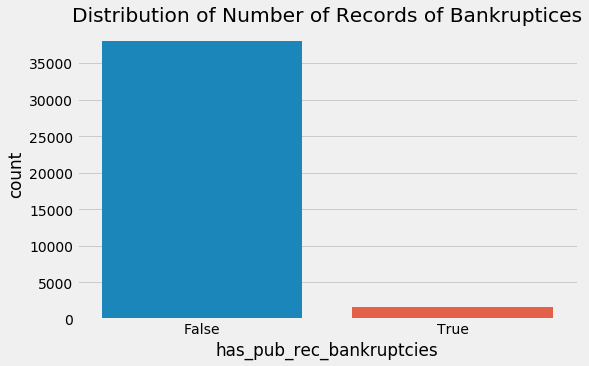

In [398]:
plt.figure(figsize=(8,5))
sns.countplot(loan_cleaned['has_pub_rec_bankruptcies'])
plt.title("Distribution of Number of Records of Bankruptices")

#### 95% of the borrowers do not have public record of Bankruptices

In [399]:
chargedOff_bankrupt=getChargedOffPercentage('has_pub_rec_bankruptcies','loan_status','id')
chargedOff_bankrupt

,has_pub_rec_bankruptcies,loan_status,count_hue_variable,Variable_Count,Percentage
0,False,Charged Off,5242,37985,13.800184
3,True,Charged Off,368,1680,21.904762


Text(0.5,1,'Percentage of Default in cases of Bankruptcies vs no Bankruptcies')

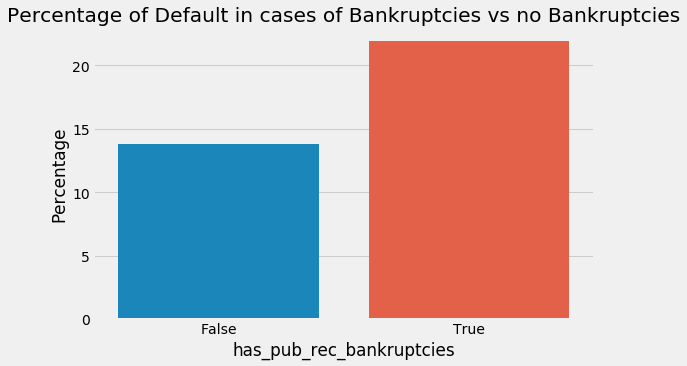

In [400]:
plt.figure(figsize=(8,5))
sns.barplot(x='has_pub_rec_bankruptcies',y='Percentage',data=chargedOff_bankrupt)
plt.title("Percentage of Default in cases of Bankruptcies vs no Bankruptcies")

#### 21% default rate when there is a record of Bankruptcies vs 13% default rate when there is none.


## Revol_Bal
revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle
If a revolving balance is high then more chances of default

In [401]:
loan_cleaned['revol_bal'].describe()

count    39665.000000 
mean     13398.594000 
std      15887.307496 
min      0.000000     
25%      3717.000000  
50%      8863.000000  
75%      17070.000000 
max      149588.000000
Name: revol_bal, dtype: float64

The data is skewed. Let us plot the distribution

Text(0.5,1,'Distribution of Revolving Balance')

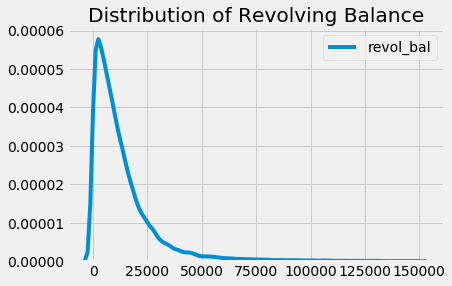

In [402]:
sns.kdeplot(loan_cleaned['revol_bal'])
plt.title("Distribution of Revolving Balance")

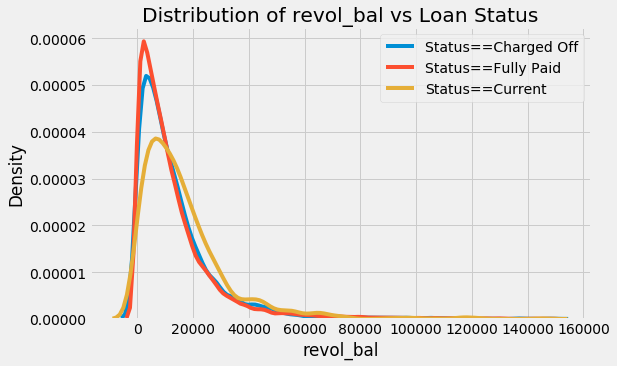

In [403]:
kde('revol_bal',loan_cleaned)

In [404]:
loan_cleaned['is_revol_bal_zero']=loan_cleaned['revol_bal'].apply(lambda x:x==0)

In [405]:
loan_cleaned['is_revol_bal_zero'].value_counts()/loan_cleaned.shape[0]

False    0.976175
True     0.023825
Name: is_revol_bal_zero, dtype: float64

Text(0.5,1,'Distribution of Revolving Balance (Zero vs Non-Zero)')

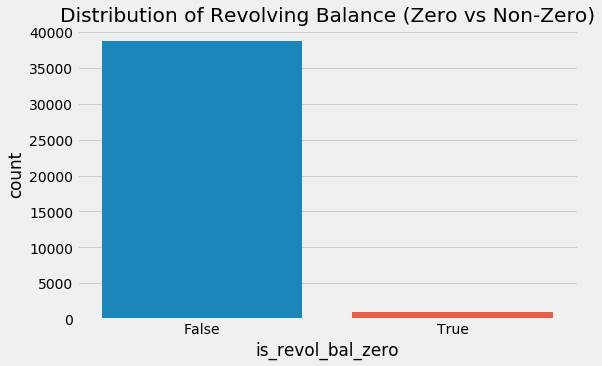

In [406]:

plt.figure(figsize=(8,5))
sns.countplot(loan_cleaned['is_revol_bal_zero'])
plt.title("Distribution of Revolving Balance (Zero vs Non-Zero)")

In [407]:
chargedOff_revol_balance=getChargedOffPercentage('is_revol_bal_zero','loan_status','id')
chargedOff_revol_balance

,is_revol_bal_zero,loan_status,count_hue_variable,Variable_Count,Percentage
0,False,Charged Off,5468,38720,14.121901
3,True,Charged Off,142,945,15.026455


Text(0.5,1,'Percentage of Default in cases of No Revolving Balance')

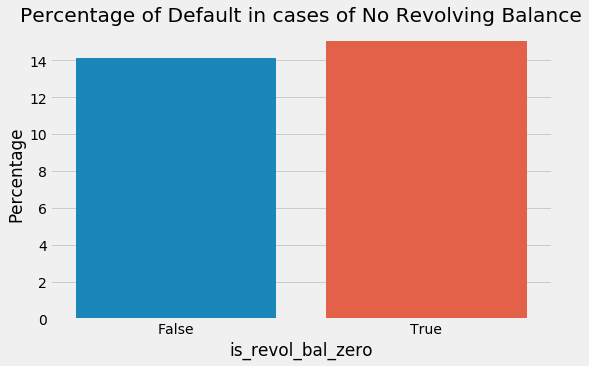

In [408]:
plt.figure(figsize=(8,5))
sns.barplot(x='is_revol_bal_zero',y='Percentage',data=chargedOff_revol_balance)
plt.title("Percentage of Default in cases of No Revolving Balance")

In [409]:
non_zero_revol_bal=loan_cleaned[loan_cleaned['revol_bal']!=0]

In [410]:
non_zero_revol_bal['log_revol_bal']=non_zero_revol_bal['revol_bal'].apply(lambda x:math.log(x))

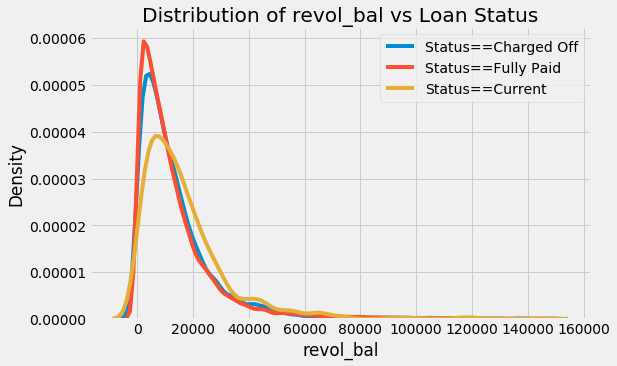

In [411]:
kde('revol_bal',non_zero_revol_bal)

### For current loans, the revolving balance is higher

## Revol_util
This is the debt to credit limit ratio. 

In [412]:
loan_cleaned['revol_util'].describe()

count    39665.000000
mean     48.832487   
std      28.331997   
min      0.000000    
25%      25.400000   
50%      49.300000   
75%      72.400000   
max      99.900000   
Name: revol_util, dtype: float64

Text(0,0.5,'Density')

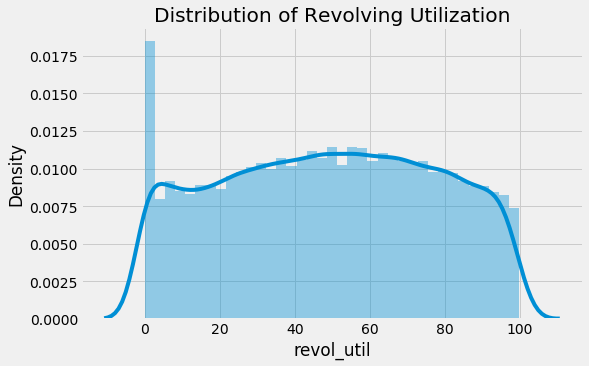

In [413]:
plt.figure(figsize=(8,5))
sns.distplot(loan_cleaned['revol_util'])
plt.title("Distribution of Revolving Utilization")
plt.ylabel("Density")

#### The distribution looks similar to DTI

Text(0.5,1,'Distribution of Revolving Utilization vs Loan Status')

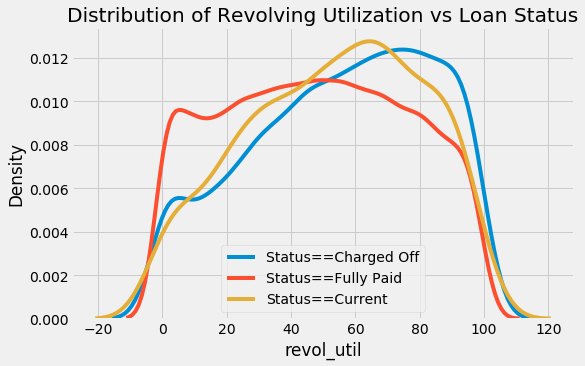

In [414]:
kde('revol_util',loan_cleaned)
plt.title("Distribution of Revolving Utilization vs Loan Status")

### Higher debt to credit limit ratio, higher rate of default. the  revolving utilization of Current loan is higher than fully paid

## total_acc
Number of credits currently the borrower has borrowed. 

In [415]:
loan_cleaned['total_acc'].describe()

count    39665.000000
mean     22.103366   
std      11.398238   
min      2.000000    
25%      14.000000   
50%      20.000000   
75%      29.000000   
max      90.000000   
Name: total_acc, dtype: float64

Text(0.5,1,'Distribution of Number of Credits Borrower has currently open')

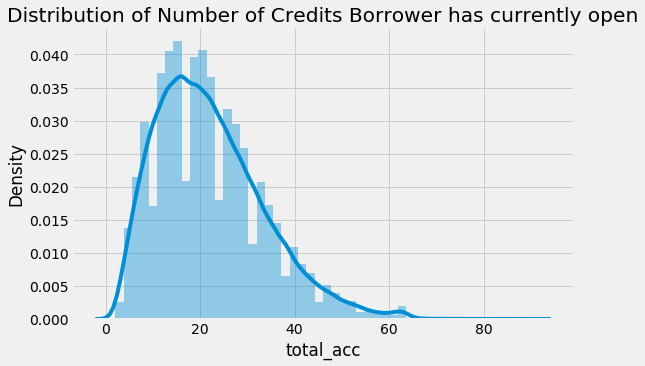

In [416]:
plt.figure(figsize=(8,5))
sns.distplot(loan_cleaned['total_acc'])
plt.ylabel("Density")
plt.title("Distribution of Number of Credits Borrower has currently open")

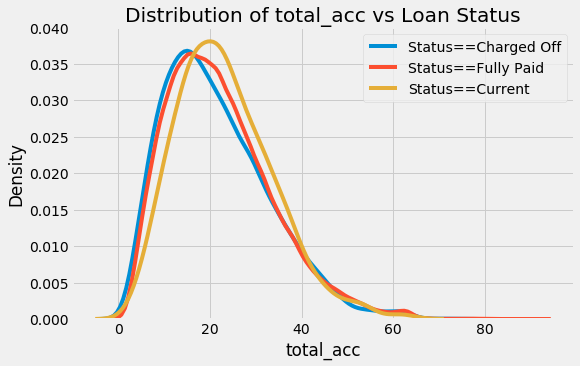

In [417]:
kde('total_acc',loan_cleaned)

#### For lower number of credit lines, higher default. The mean is not very significant between Fully Paid and Charged off. But the mean is higher for Current loans

### total_pymnt & total_pymny_inv - Total Amount Receieved till date for the Amount Funded & Amount Funded by Investors respetively.

Hypothesis :If borrower has paid lesser towards the loan then higher chances of default

Text(0.5,1,'Distribution of Total Amount recieved for amount funded and amount funded by investors')

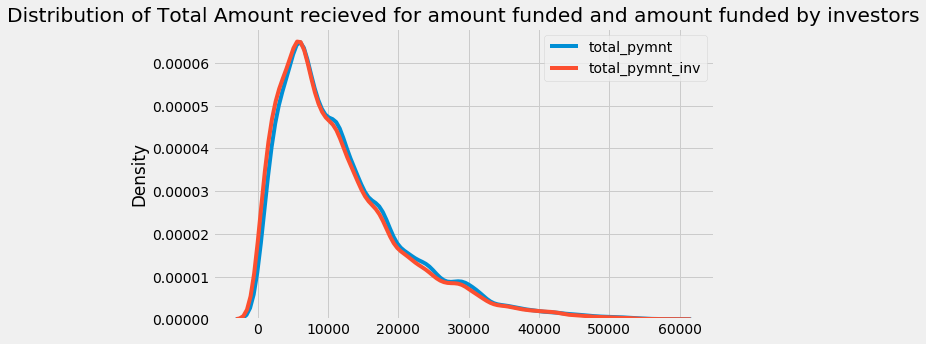

In [418]:
plt.figure(figsize=(8,5))
sns.kdeplot(loan_cleaned['total_pymnt'],label='total_pymnt')
sns.kdeplot(loan_cleaned['total_pymnt_inv'],label='total_pymnt_inv')
plt.ylabel("Density")
plt.title("Distribution of Total Amount recieved for amount funded and amount funded by investors")

#### The total_pymnt and total_pymnt_inv are correlated, similar to amount funded and amount_funded_inv

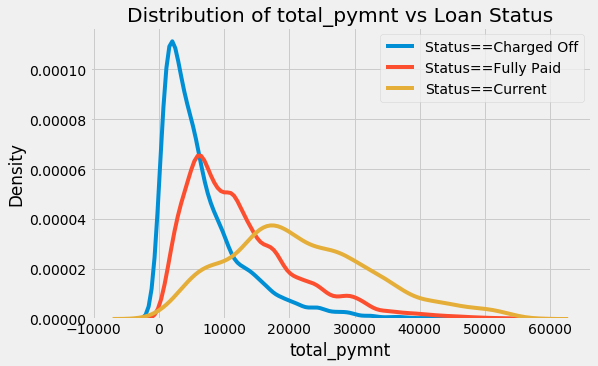

In [419]:
kde('total_pymnt',loan_cleaned)

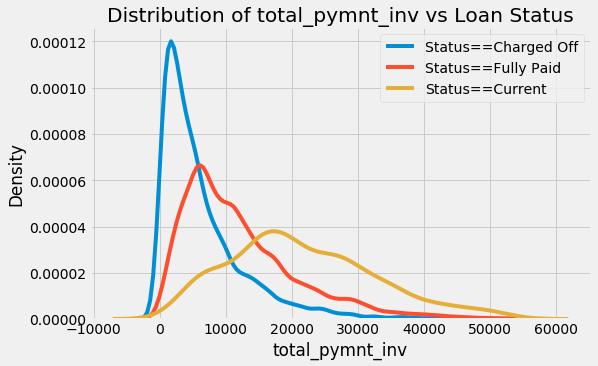

In [420]:
kde('total_pymnt_inv',loan_cleaned)

#### Our hypothesis is right, if a borrower has paid lesser amounts towards the loan chances of default is higher.
May be payment/amount funded will be a good metric. If amount is low and payment is low then user need not default.
Let us create metric percent_paid and percent_paid_inv

In [421]:
loan_cleaned['percent_paid']=loan_cleaned['total_pymnt']/loan_cleaned['funded_amnt']
loan_cleaned['percent_paid_inv']=loan_cleaned['total_pymnt_inv']/loan_cleaned['funded_amnt_inv']

Text(0,0.5,'Density')

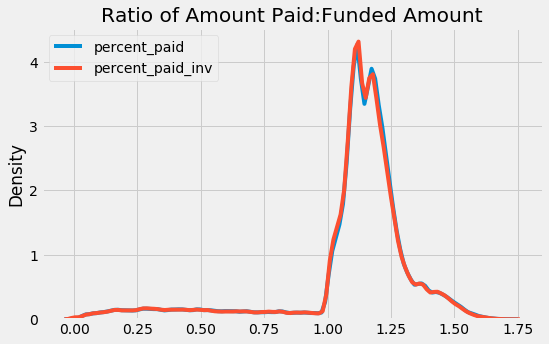

In [422]:
plt.figure(figsize=(8,5))
sns.kdeplot(loan_cleaned['percent_paid'],label='percent_paid')
sns.kdeplot(loan_cleaned['percent_paid_inv'],label='percent_paid_inv')
plt.title("Ratio of Amount Paid:Funded Amount")
plt.ylabel("Density")

#### Percent paid and percent paid to investors are highly correlated.

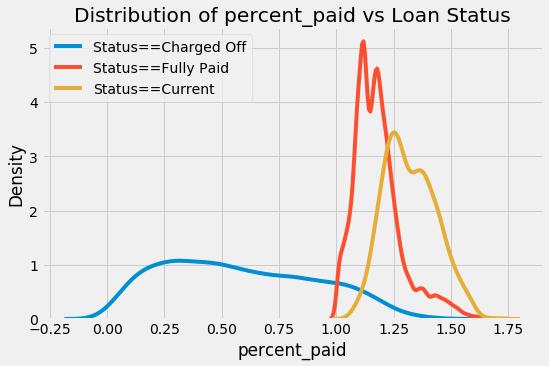

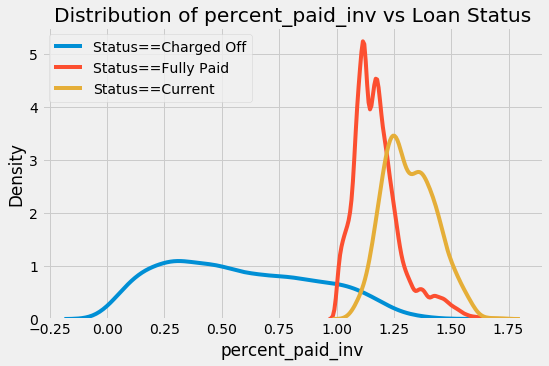

In [423]:
plt.figure(1)
kde('percent_paid',loan_cleaned)

plt.figure(2)
kde('percent_paid_inv',loan_cleaned)

#### If very low percentage of amount is paid back then higher chances of default.

### Total Principal Paid towards the loan - total_rec_prcnp & Total intrest paid towards the loan - total_rec_int

Text(0,0.5,'Density')

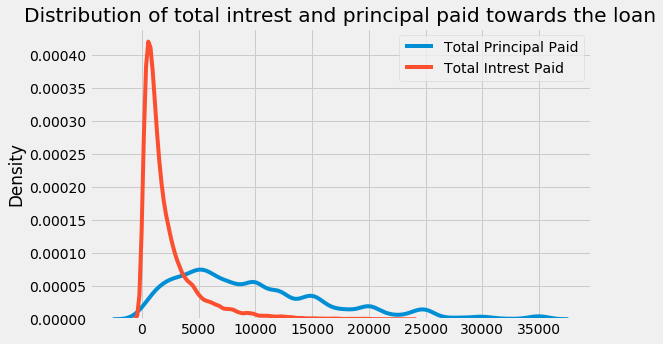

In [424]:
plt.figure(figsize=(8,5))
sns.kdeplot(loan_cleaned['total_rec_prncp'],label='Total Principal Paid')
sns.kdeplot(loan_cleaned['total_rec_int'],label='Total Intrest Paid')
plt.title("Distribution of total intrest and principal paid towards the loan")
plt.ylabel("Density")

#### The intrest paid is higher than the principal

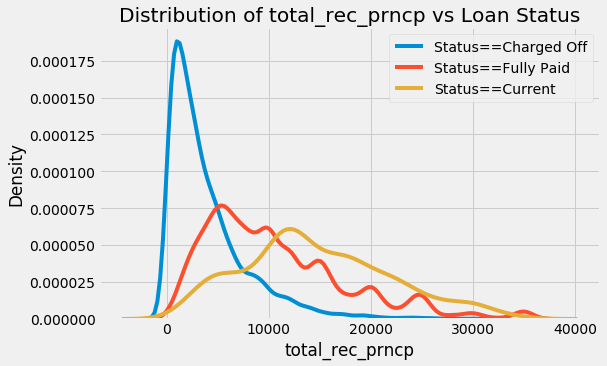

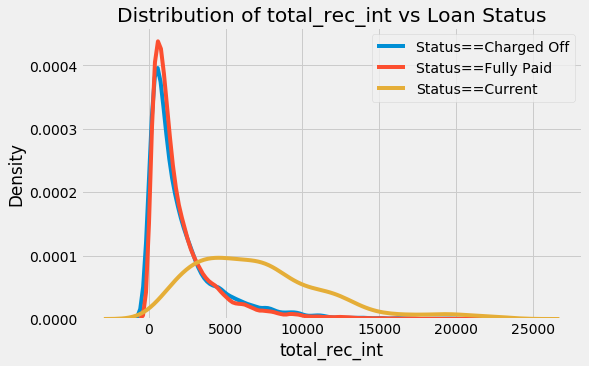

In [425]:
plt.figure(1)
kde('total_rec_prncp',loan_cleaned)

plt.figure(2)
kde('total_rec_int',loan_cleaned)

#### The principal paid towards a loan is lower for default. And also, the distribution is similar to Total Payment. The total itrest paid is higher for current loans.The distribution of total intrest paid is similar for fully paid and charged off loans

In [426]:
corr_fields=['total_pymnt','total_rec_int','total_rec_prncp']
corr_data=loan_cleaned.loc[:,corr_fields]
corrs = corr_data.corr()

In [427]:
corrs

,total_pymnt,total_rec_int,total_rec_prncp
total_pymnt,1.000000,0.828712,0.971442
total_rec_int,0.828712,1.000000,0.683880
total_rec_prncp,0.971442,0.683880,1.000000


Text(0.5,1,'Correlation Heatmap')

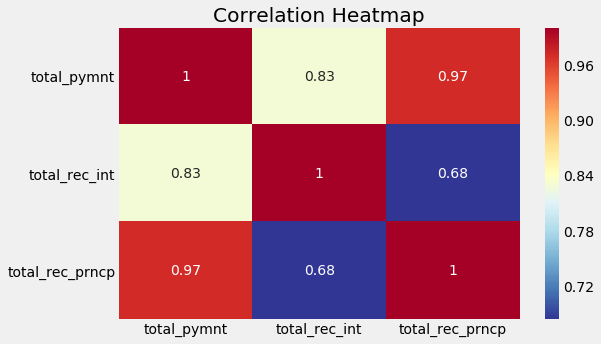

In [428]:
plt.figure(figsize=(8,5))
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r,annot = True)
plt.title('Correlation Heatmap')

The correlation betwen total_payment and total principal paid is highly correlated -0.97
also, correlation between total intrest paid and total_payment is 0.83.
So instead of having all three fields, it would be better to have just one column total_payment as
driver variable

### Late fees recieved till date -total_rec_late_fee
 Hypothesis : if borrower has paid a lot of late fee, then more tendency to default as he will not be able to pay on tim

Text(0,0.5,'Density')

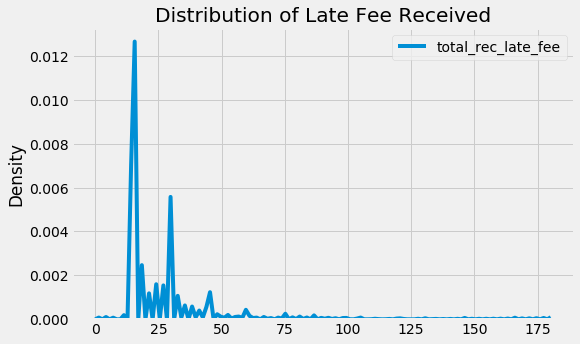

In [429]:
plt.figure(figsize=(8,5))
sns.kdeplot(loan_cleaned['total_rec_late_fee'])
plt.title("Distribution of Late Fee Received")
plt.ylabel("Density")

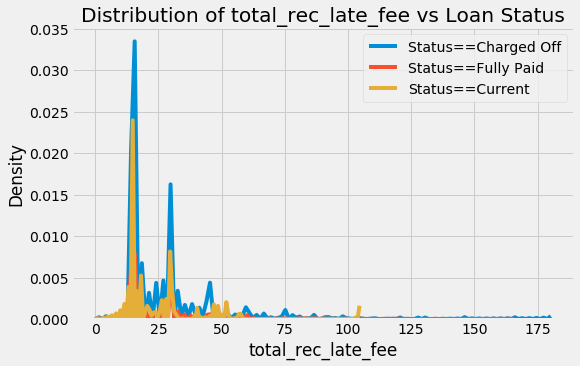

In [430]:
kde('total_rec_late_fee',loan_cleaned)

#### The kdeplot is not conclusive. We will have to calculate the mean across the groups and see how different they are

In [431]:
mean_late_fee_fullypaid=np.mean(loan_cleaned.loc[loan_cleaned['loan_status']=='Fully Paid','total_rec_late_fee'].values)
mean_late_fee_chargedOff=np.mean(loan_cleaned.loc[loan_cleaned['loan_status']=='Charged Off','total_rec_late_fee'].values)
mean_late_fee_current=np.mean(loan_cleaned.loc[loan_cleaned['loan_status']=='Current','total_rec_late_fee'].values)

print("Mean Late Fee for Charged Off: "+ str(mean_late_fee_chargedOff))
print("Mean Late Fee for Fully Paid: "+str(mean_late_fee_fullypaid))
print("Mean Late Fee for Current: "+str(mean_late_fee_current))




mean_late_fee_fullypaid=np.median(loan_cleaned.loc[loan_cleaned['loan_status']=='Fully Paid','total_rec_late_fee'].values)
mean_late_fee_chargedOff=np.median(loan_cleaned.loc[loan_cleaned['loan_status']=='Charged Off','total_rec_late_fee'].values)
mean_late_fee_current=np.median(loan_cleaned.loc[loan_cleaned['loan_status']=='Current','total_rec_late_fee'].values)

print("Median Late Fee for Charged Off: "+ str(mean_late_fee_chargedOff))
print("Median Late Fee for Fully Paid: "+str(mean_late_fee_fullypaid))
print("Median Late Fee for Current: "+str(mean_late_fee_current))

Mean Late Fee for Charged Off: 4.296686874233511
Mean Late Fee for Fully Paid: 0.8690093631779736
Mean Late Fee for Current: 1.1728778238421051
Median Late Fee for Charged Off: 0.0
Median Late Fee for Fully Paid: 0.0
Median Late Fee for Current: 0.0


#### The mean late fee for Charged off is higher though the median is zero for all groups. This indicates that for Charged there are more loans where the late fee is higher

We have analysed the lending club loan data and analysed variables that can affect default. We have also created derived metrics that were more intutive and useful than the original value themselves. For example, has_pub_rec is more useful measure than having the number of public records as this field was mostly zero. Similarly percent of annual income paid towards loan was more useful than using annual income or loan amount directly. 